In [105]:
from cargar_datos import cargarDatos
import pandas as pd
df = cargarDatos()

In [106]:
df.head()

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2586712032,Aaron,Terry,42.0,Masculino,NYC,Bajo,1,19.41,Sí,No,Vegetariano,No,8914894420,None,Efectivo,807
1,8083396378,Aaron,Edwards,23.0,Masculino,Dallas,Bajo,0,0.00,Sí,Sí,Carnes,No,001-821-337-4847x28301,None,Tarjeta,878
2,1492119727,Aaron,Mason,24.0,Masculino,Houston,Bajo,1,8.56,No,Sí,Mariscos,No,489-471-9165,jason75@example.net,Tarjeta,924
3,9988027682,Aaron,Kennedy,24.0,Masculino,Boston,Bajo,2,7.65,No,Sí,Pescado,No,None,gonzalezryan@example.net,Efectivo,928
4,6902077458,Aaron,Gomez,26.0,Masculino,Denver,Bajo,3,11.72,No,Sí,Carnes,No,383.356.2737,None,Tarjeta,946


In [107]:
df.columns

Index(['id_persona', 'nombre', 'apellido', 'edad', 'genero',
       'ciudad_residencia', 'estrato_socioeconomico', 'frecuencia_visita',
       'promedio_gasto_comida', 'ocio', 'consume_licor',
       'preferencias_alimenticias', 'membresia_premium', 'telefono_contacto',
       'correo_electronico', 'tipo_de_pago_mas_usado', 'ingresos_mensuales'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  Int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  Int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

Se pretende hacer un modelo de machine learning pare predecir si una persona consume licor o no. Esto debido a que me parece interesante conocer las variables que pueden influir en los hábitos de consumo de licor de las personas. Por lo tanto se eliminarán las columnas que no influyen en la predicción.

In [109]:
df = df.drop(columns=['id_persona','nombre','apellido','telefono_contacto','correo_electronico'])

se revisarán si las columnas tipo object tienen un tipo de datos estandar o variado

In [110]:
obj_cols = df.select_dtypes(include=['object']).columns
for columna in df[obj_cols].columns:
    print(df[columna].value_counts())

genero
Femenino     15044
Masculino    14956
Name: count, dtype: int64
ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: count, dtype: int64
estrato_socioeconomico
Medio       9325
Alto        9038
Bajo        6161
Muy Alto    5476
Name: count, dtype: int64
ocio
No    15094
Sí    14906
Name: count, dtype: int64
consume_licor
Sí    18483
No    11517
Name: count, dtype: int64
preferencias_alimenticias
Carnes         7916
Vegetariano    6580
Mariscos       5212
Vegano         3267
Pescado        2983
Otro           2639
Name: count, dtype: int64
membresia_premium
No    17155
Sí    12845
Name: count, dtype: int64
tipo_de_pago_mas_usado
Efectivo        11813
Tarjeta          9954
App              7678
Criptomoneda      555
Name: count, dtype: int64


In [111]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       29899 non-null  float64
 1   genero                     30000 non-null  object 
 2   ciudad_residencia          30000 non-null  object 
 3   estrato_socioeconomico     30000 non-null  object 
 4   frecuencia_visita          30000 non-null  Int64  
 5   promedio_gasto_comida      29855 non-null  float64
 6   ocio                       30000 non-null  object 
 7   consume_licor              30000 non-null  object 
 8   preferencias_alimenticias  28597 non-null  object 
 9   membresia_premium          30000 non-null  object 
 10  tipo_de_pago_mas_usado     30000 non-null  object 
 11  ingresos_mensuales         30000 non-null  Int64  
dtypes: Int64(2), float64(2), object(8)
memory usage: 2.8+ MB


## Unificación de la forma de representación de los nulos
Se hará una imputación por la mediana para las columnas numéricas y por la moda para las columnas categóricas, esto debido a que la imputación con la mediana no es sensible a atípicos y la moda permite conservar una estructura de la variable cercana a la original.

In [112]:
cols_with_nulls = df.columns[df.isna().any()].tolist()

for col in cols_with_nulls:

    if col == 'preferencias_alimenticias':
        # Imputación por la moda
        mode_vals = df[col].mode(dropna=True)
        if not mode_vals.empty:
            df[col] = df[col].fillna(mode_vals.iloc[0])
    else:
        # Imputación por la mediana (numéricas)
        med = df[col].median()
        df[col] = df[col].fillna(med)

## Conversión de datos a su tipo correcto

In [113]:
df['consume_licor'] = df['consume_licor'].map({'Sí': 1, 'No': 0})
df['consume_licor'] = df['consume_licor'].astype('int8')


In [ ]:
from pandas.api.types import CategoricalDtype


# Definir el orden explícito
orden_tendencia = CategoricalDtype(
    categories=["Bajo", "Medio", "Alto", "Muy Alto"],
    ordered=True
)

# Aplicar al DataFrame
df["estrato_socioeconomico"] = df["estrato_socioeconomico"].astype(orden_tendencia)
df["genero"] = df["genero"].astype("category")
df["ciudad_residencia"] = df["ciudad_residencia"].astype("category")
df["ocio"] = df["ocio"].astype("category")
df["preferencias_alimenticias"] = df["preferencias_alimenticias"].astype("category")
df["membresia_premium"] = df["membresia_premium"].astype("category")
df["tipo_de_pago_mas_usado"] = df["tipo_de_pago_mas_usado"].astype("category")

In [115]:
correlacion_con_consume_licor = df.corrwith(df['consume_licor'],method='pearson', numeric_only=True)
print(correlacion_con_consume_licor)

edad                    -0.164655
frecuencia_visita       -0.006656
promedio_gasto_comida   -0.001471
consume_licor            1.000000
ingresos_mensuales       0.000215
dtype: float64


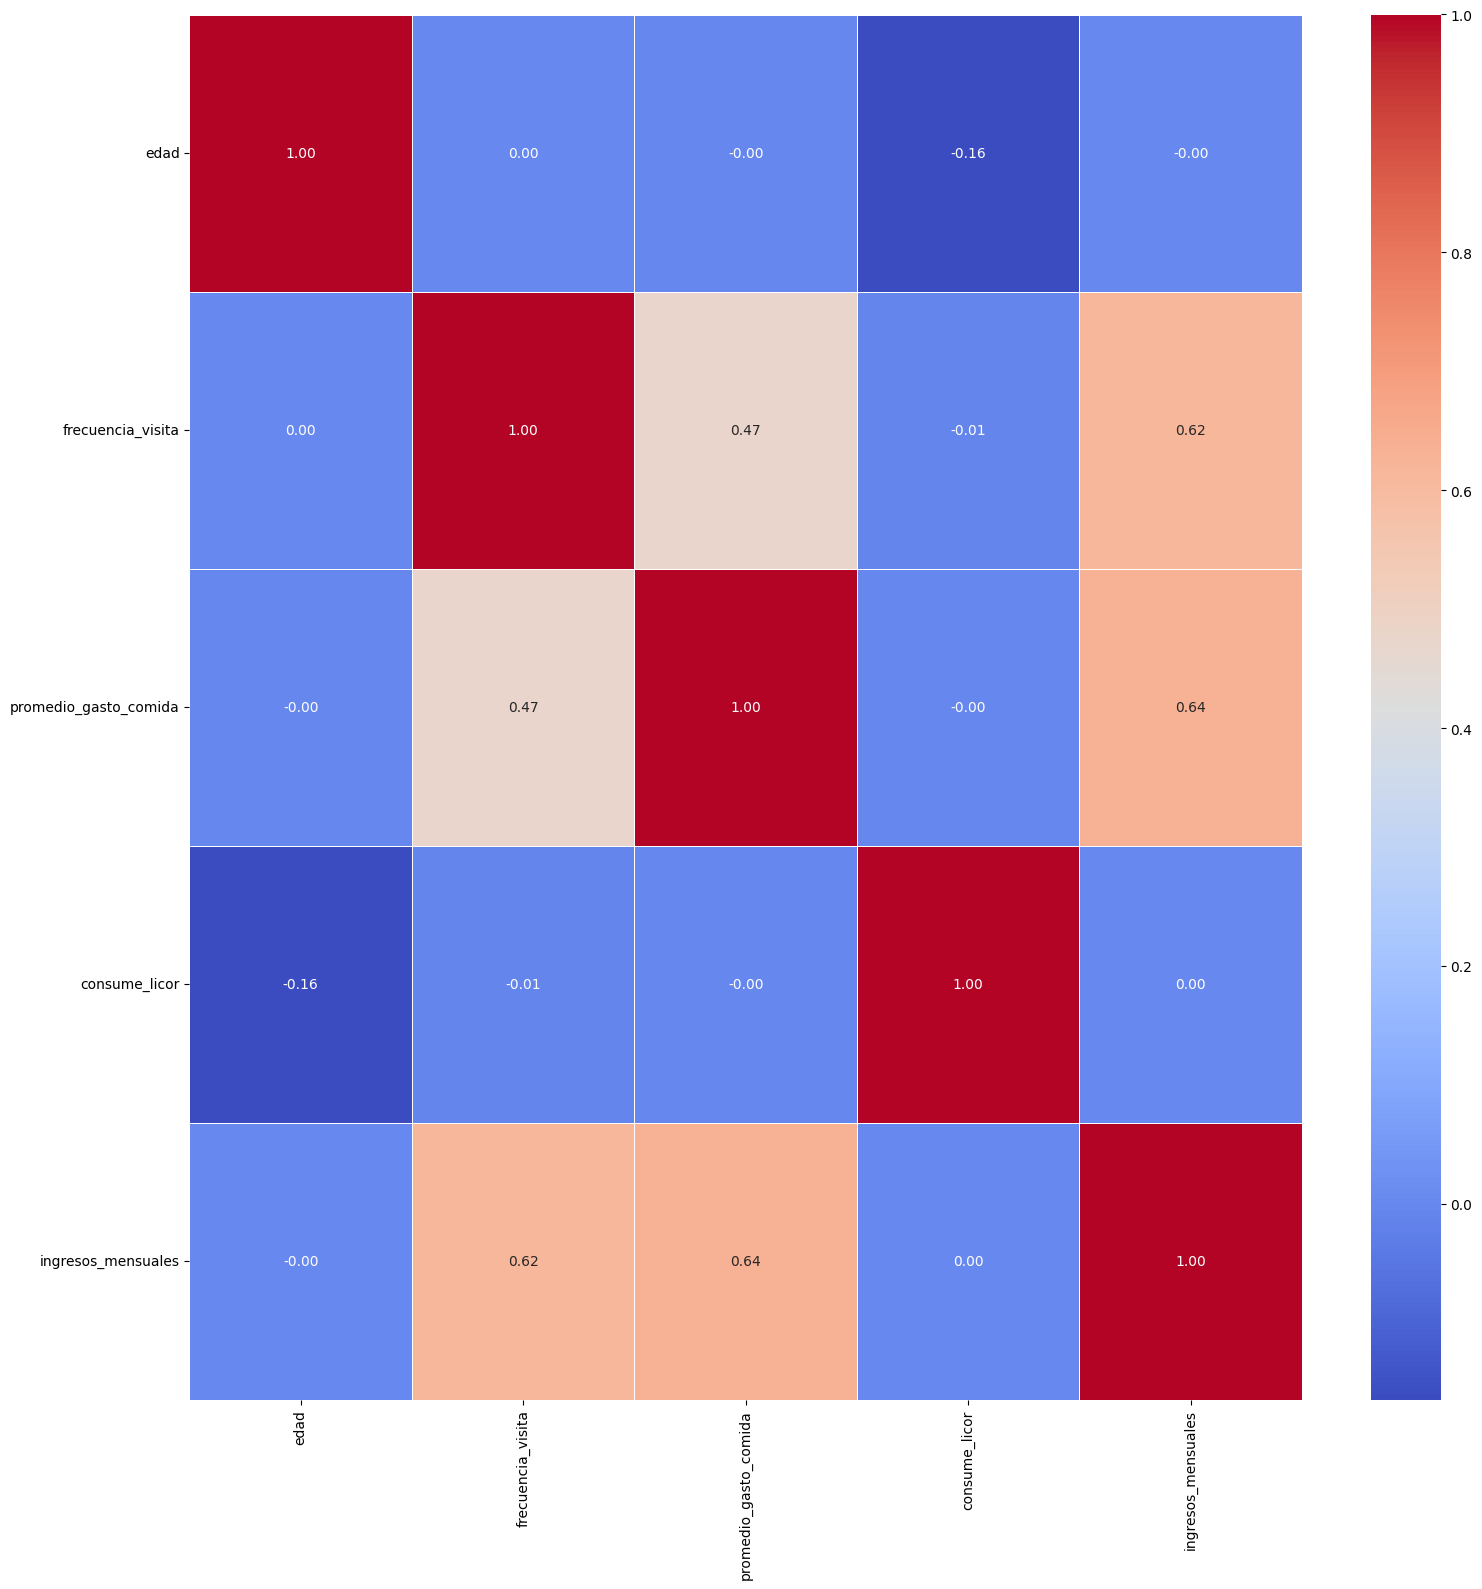

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(method='pearson', numeric_only=True)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, ax=ax, annot=True, fmt=".2f",
            xticklabels=True, yticklabels=True,
            cmap="coolwarm", linewidths=.5)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

como se puede observar, entre mayores son los ingresos mayor es el gasto en comida y visita con mayor frecuencia

## Análisis univariable

In [117]:
df.describe()

,edad,frecuencia_visita,promedio_gasto_comida,consume_licor,ingresos_mensuales
count,30000.000000,30000.0,30000.000000,30000.000000,30000.0
mean,49.662767,3.896133,32.569167,0.616100,5389.755867
std,23.799416,2.741532,26.343309,0.486342,4538.491728
min,-5.000000,-3.0,0.000000,0.000000,800.0
25%,33.000000,2.0,13.330000,0.000000,1860.0
50%,49.000000,4.0,25.510000,1.000000,3402.0
75%,65.000000,5.0,44.280000,1.000000,7761.0
max,300.000000,10.0,149.970000,1.000000,17999.0


In [118]:
df.describe(include='category')

,genero,ciudad_residencia,estrato_socioeconomico,ocio,preferencias_alimenticias,membresia_premium,tipo_de_pago_mas_usado
count,30000,30000,30000,30000,30000,30000,30000
unique,2,10,4,2,6,2,4
top,Femenino,Chicago,Medio,No,Carnes,No,Efectivo
freq,15044,5384,9325,15094,9319,17155,11813


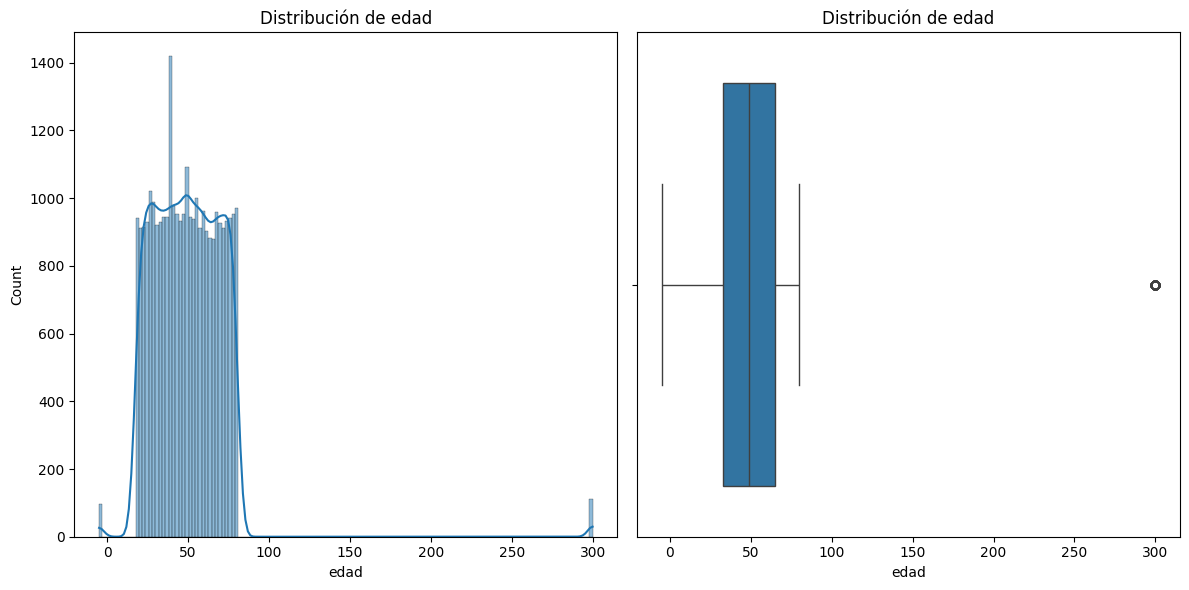

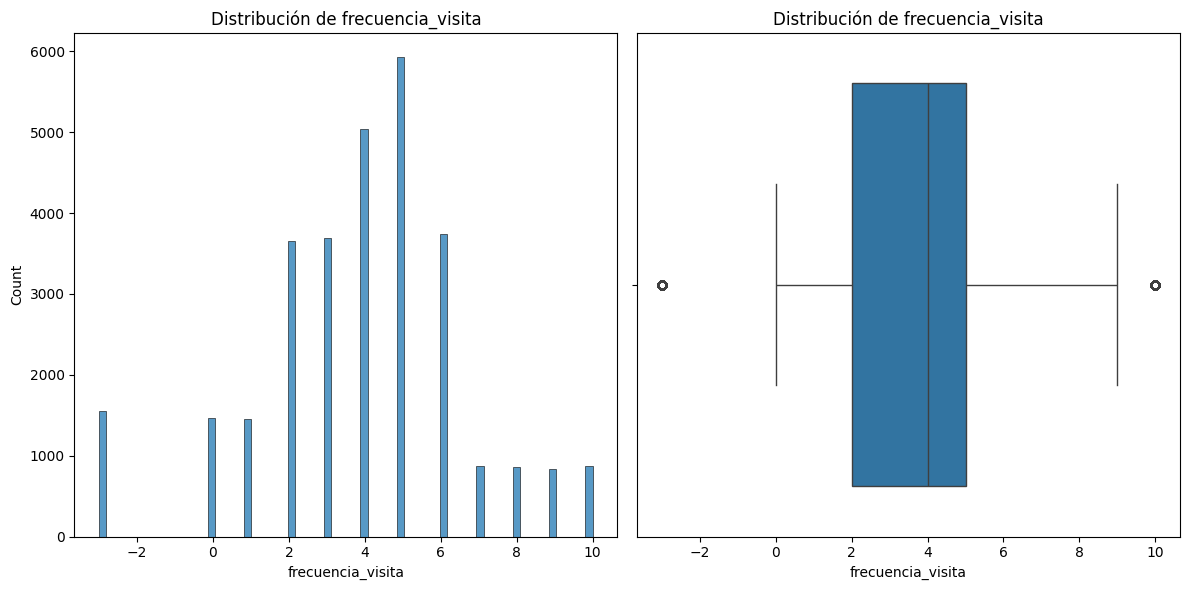

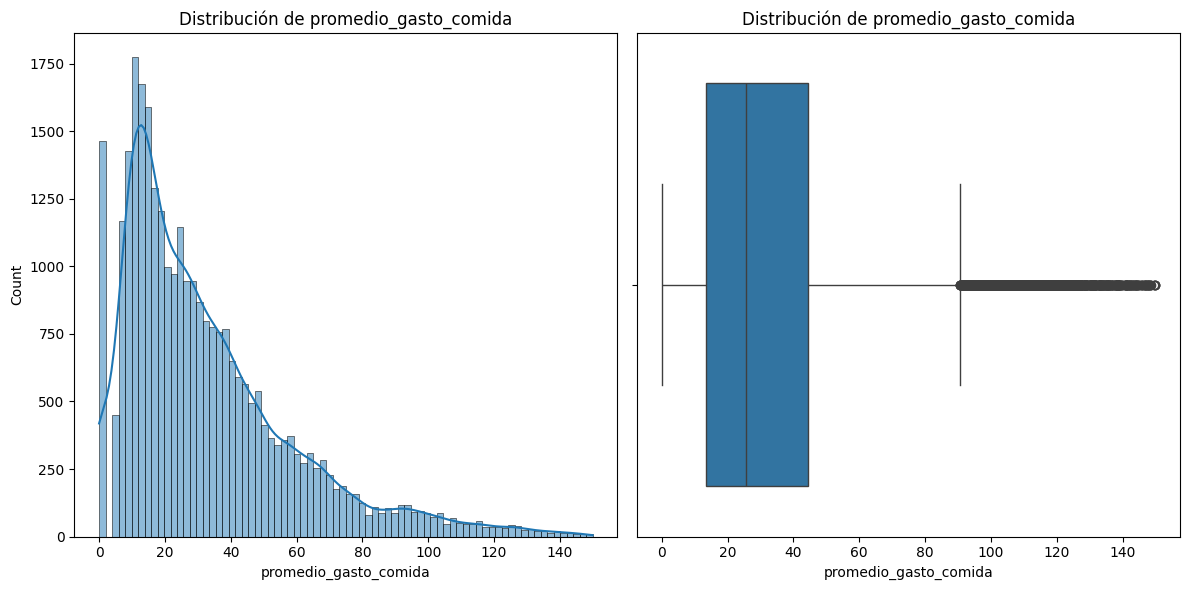

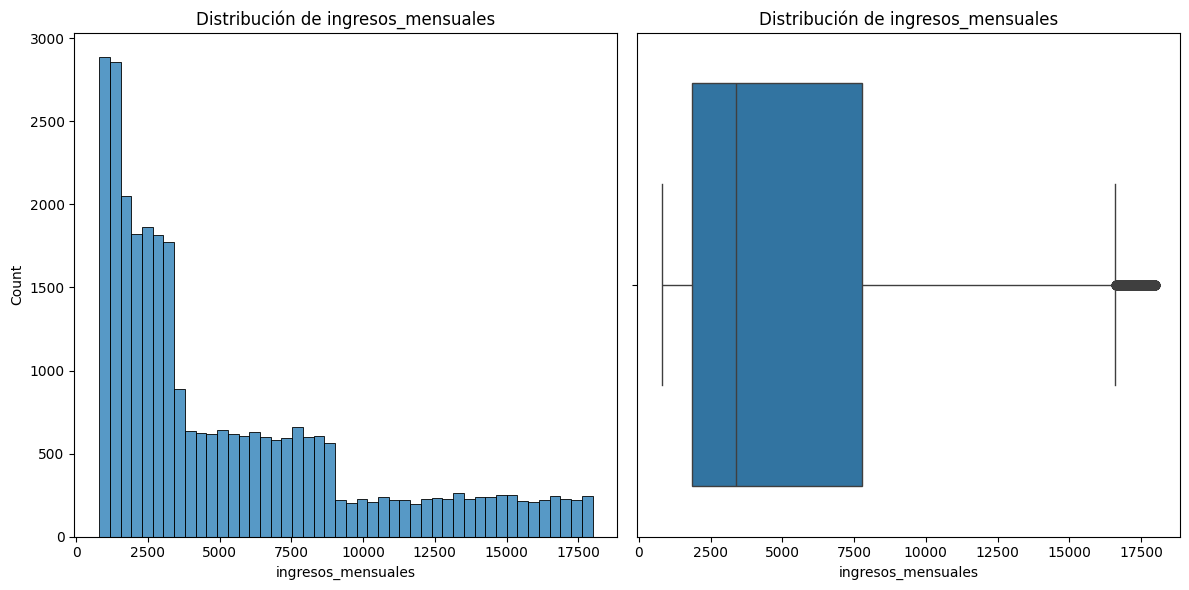

In [119]:
# Variables numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    #si la columna es de tipo float activar el kde y si no, no activarlo
    if df[col].dtype == 'float64':
        
        sns.histplot(data=df, x=col, kde=True)
    else:
        sns.histplot(data=df, x=col, kde=False)
        
    plt.title(f'Distribución de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribución de {col}')

    plt.tight_layout()
    plt.show()

In [120]:
# tomar los registros donde la edad es menor a 110 años
df = df[df['edad'] < 110]

In [121]:
def hacerAnálisisDescriptivo(serie):
  #Se hallan las medidas
  media = serie.mean()
  mediana = serie.median()
  moda = serie.mode()[0]
  desviaciónEstandar = serie.std()
  varianza = desviaciónEstandar**2
  curtosis = serie.kurt()
  asimetría = serie.skew()
  máximo = max(serie)
  mínimo = min(serie)
  rango = máximo - mínimo
  totalDeDatos = len(serie)
  coeficienteDeVariación = (desviaciónEstandar/media)*100
  percentil25 = serie.quantile(0.25)
  percentil50 = serie.quantile(0.50)
  percentil75 = serie.quantile(0.75)
  rangoIntercuartil = percentil75 - percentil25
  primerBigote = percentil25 - rangoIntercuartil*1.5
  segundoBigote = percentil75 + rangoIntercuartil*1.5

  #Se muestran en pantalla las medidas con 1 o 2 decimales
  print(f"media = {'{:.2f}'.format(media)}")
  print(f'mediana = {mediana}')
  print(f'moda = {moda}')
  print(f"desviación estándar = {'{:.2f}'.format(desviaciónEstandar)}")
  print(f"coeficiente de variación = {'{:.2f}'.format(coeficienteDeVariación)} %") 
  print(f"varianza = {'{:.2f}'.format(varianza)}")
  print(f"curtosis = {'{:.2f}'.format(curtosis)}")
  print(f"asimetría = {'{:.2f}'.format(asimetría)}")
  print(f'máximo = {máximo}')
  print(f'mínimo = {mínimo}')
  print(f'rango = {rango}')
  print(f'percentil 25 = {percentil25}')
  print(f'percentil 50 = {percentil50}')
  print(f'percentil 75 = {percentil75}')
  print(f'cantidad de datos = {totalDeDatos}')


  #se crea el código para encontrar los valores atípicos y se imprimen ordenados ascendentemente
  valoresAtípicos = []
  for dato in serie:
    if dato < primerBigote or dato > segundoBigote:
      valoresAtípicos.append(dato)
  print('outliers : ', end = '')
  valoresAtípicos = list(set(valoresAtípicos))  # Eliminar duplicados
  print(*sorted(valoresAtípicos))

In [122]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    print(f'\nAnálisis descriptivo de la columna {col}:')
    hacerAnálisisDescriptivo(df[col])


Análisis descriptivo de la columna edad:
media = 48.74
mediana = 49.0
moda = 49.0
desviación estándar = 18.36
coeficiente de variación = 37.66 %
varianza = 337.01
curtosis = -1.04
asimetría = -0.04
máximo = 80.0
mínimo = -5.0
rango = 85.0
percentil 25 = 33.0
percentil 50 = 49.0
percentil 75 = 64.0
cantidad de datos = 29890
outliers : 

Análisis descriptivo de la columna frecuencia_visita:
media = 3.89
mediana = 4.0
moda = 5
desviación estándar = 2.74
coeficiente de variación = 70.40 %
varianza = 7.52
curtosis = 0.65
asimetría = -0.35
máximo = 10
mínimo = -3
rango = 13
percentil 25 = 2.0
percentil 50 = 4.0
percentil 75 = 5.0
cantidad de datos = 29890
outliers : -3 10

Análisis descriptivo de la columna promedio_gasto_comida:
media = 32.57
mediana = 25.51
moda = 0.0
desviación estándar = 26.34
coeficiente de variación = 80.88 %
varianza = 693.81
curtosis = 2.15
asimetría = 1.43
máximo = 149.97
mínimo = 0.0
rango = 149.97
percentil 25 = 13.33
percentil 50 = 25.51
percentil 75 = 44.28
can

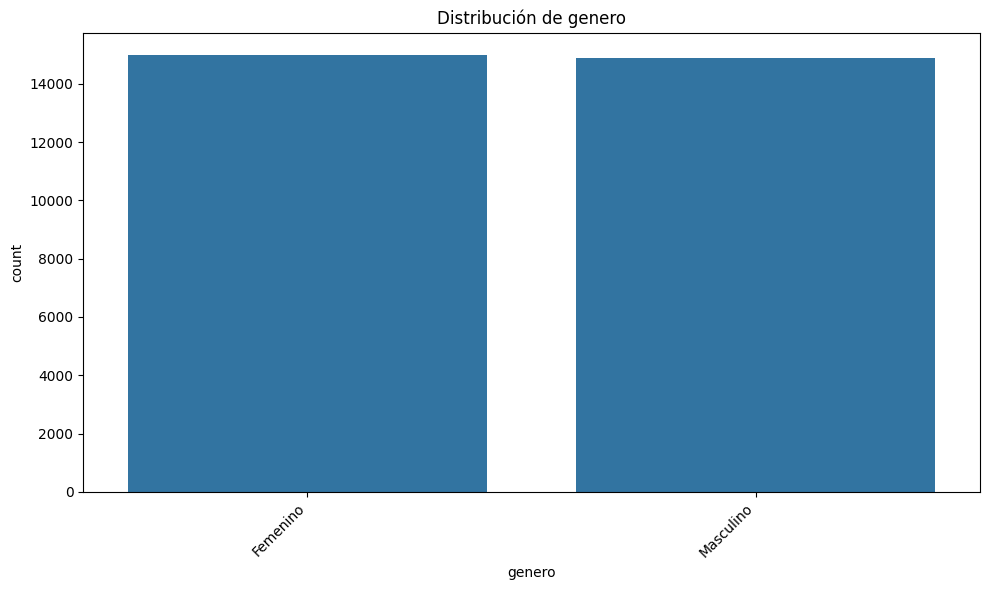

genero
Femenino     14994
Masculino    14896
Name: count, dtype: int64


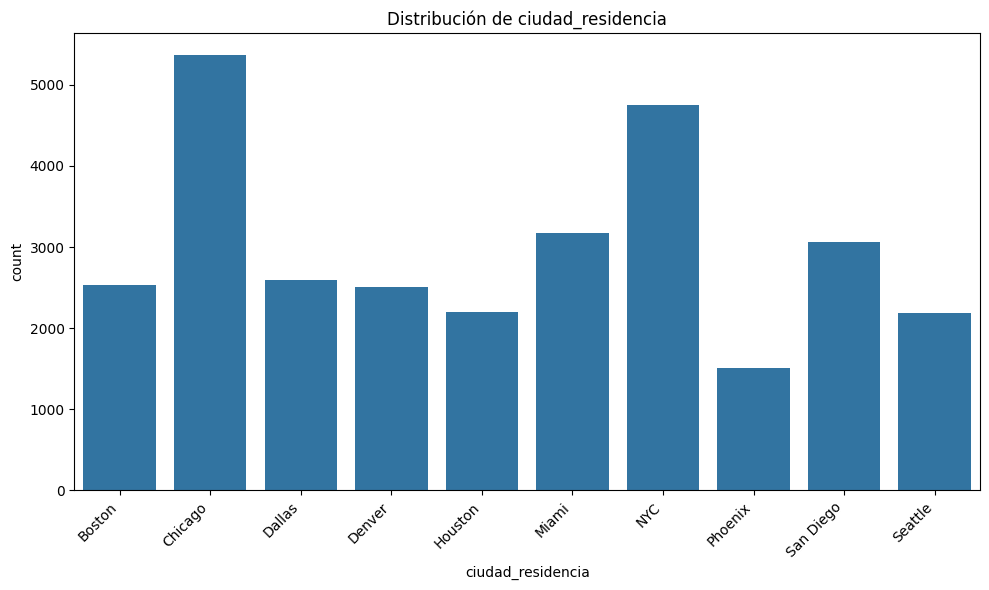

ciudad_residencia
Chicago      5371
NYC          4755
Miami        3170
San Diego    3061
Dallas       2593
Boston       2538
Denver       2511
Houston      2202
Seattle      2181
Phoenix      1508
Name: count, dtype: int64


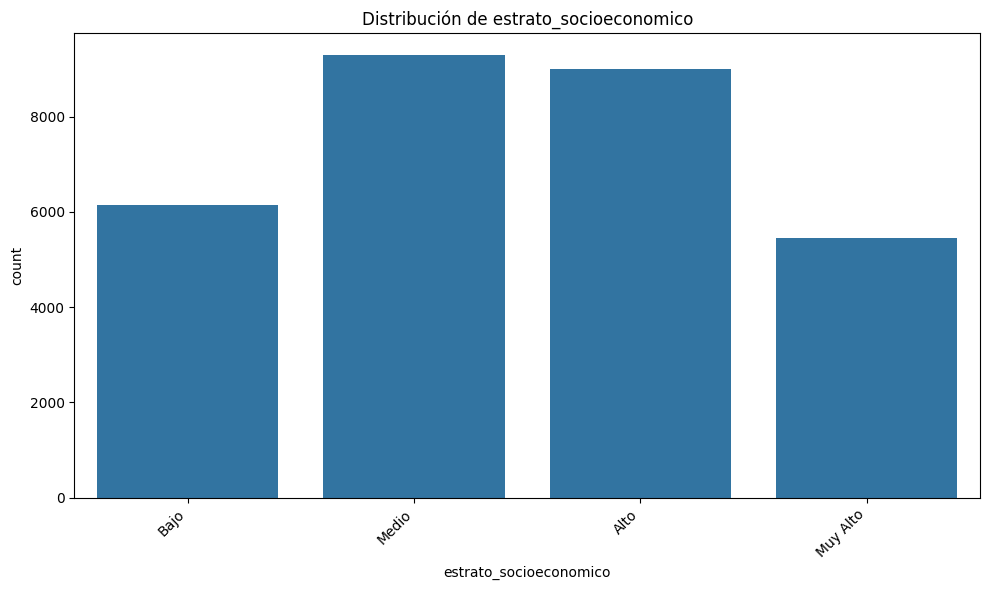

estrato_socioeconomico
Medio       9297
Alto        9002
Bajo        6142
Muy Alto    5449
Name: count, dtype: int64


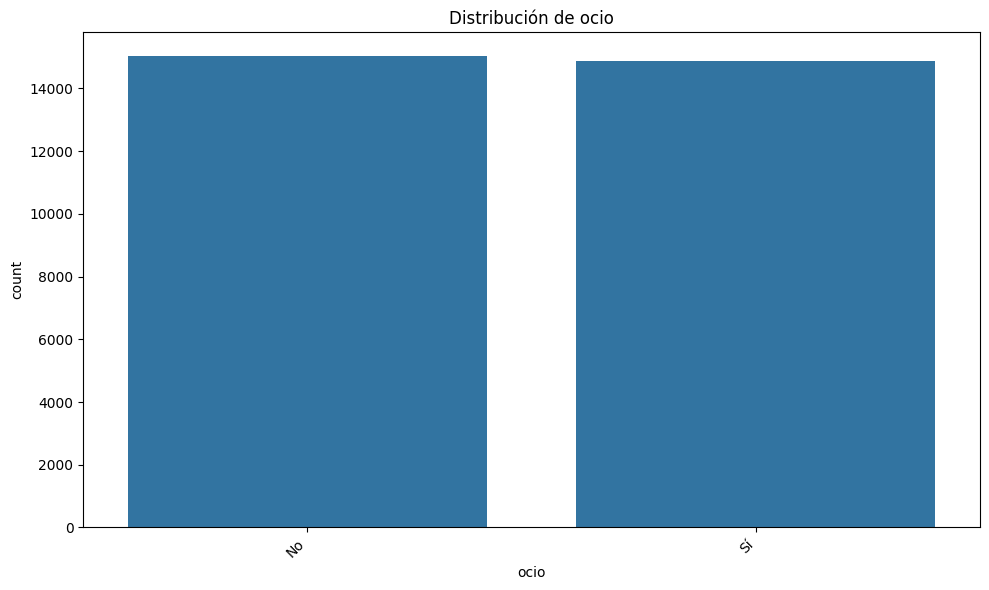

ocio
No    15034
Sí    14856
Name: count, dtype: int64


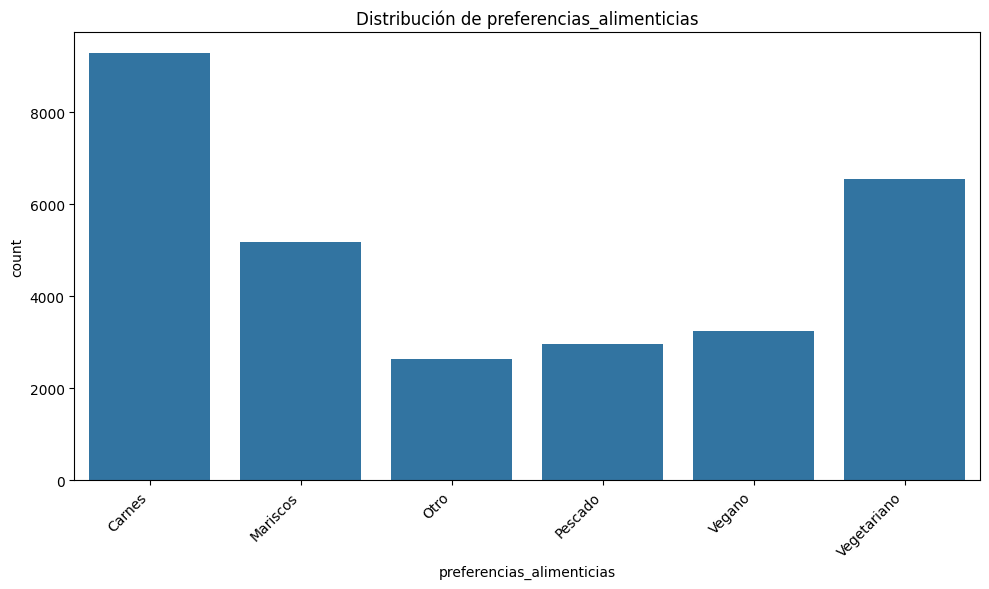

preferencias_alimenticias
Carnes         9287
Vegetariano    6556
Mariscos       5193
Vegano         3252
Pescado        2973
Otro           2629
Name: count, dtype: int64


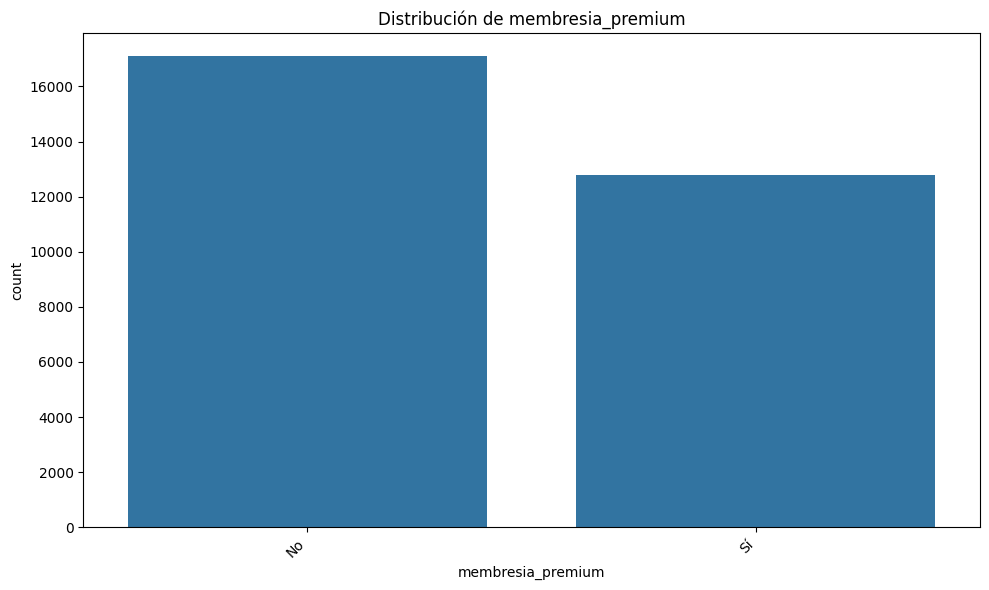

membresia_premium
No    17090
Sí    12800
Name: count, dtype: int64


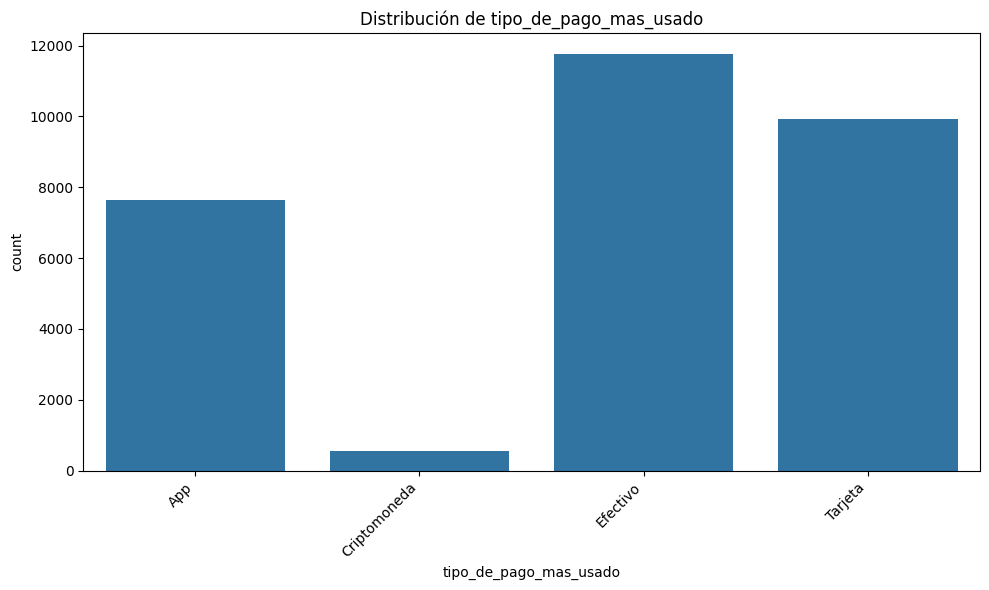

tipo_de_pago_mas_usado
Efectivo        11772
Tarjeta          9916
App              7647
Criptomoneda      555
Name: count, dtype: int64


In [123]:
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print(df[col].value_counts())

## Análisis bivariable respecto a la variable objetivo consume_licor

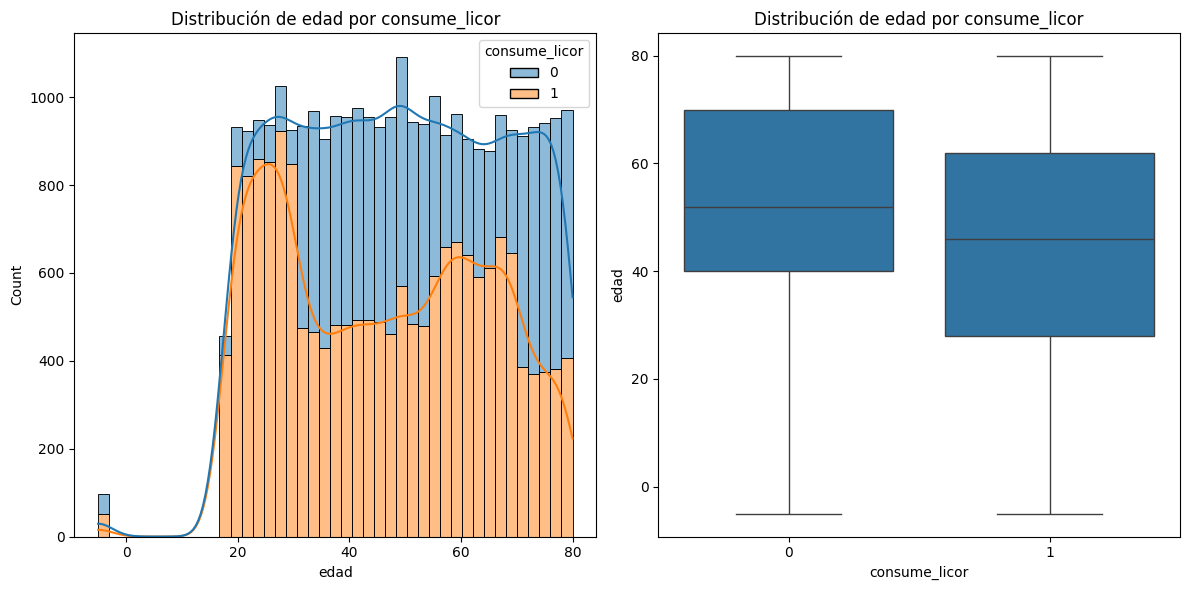

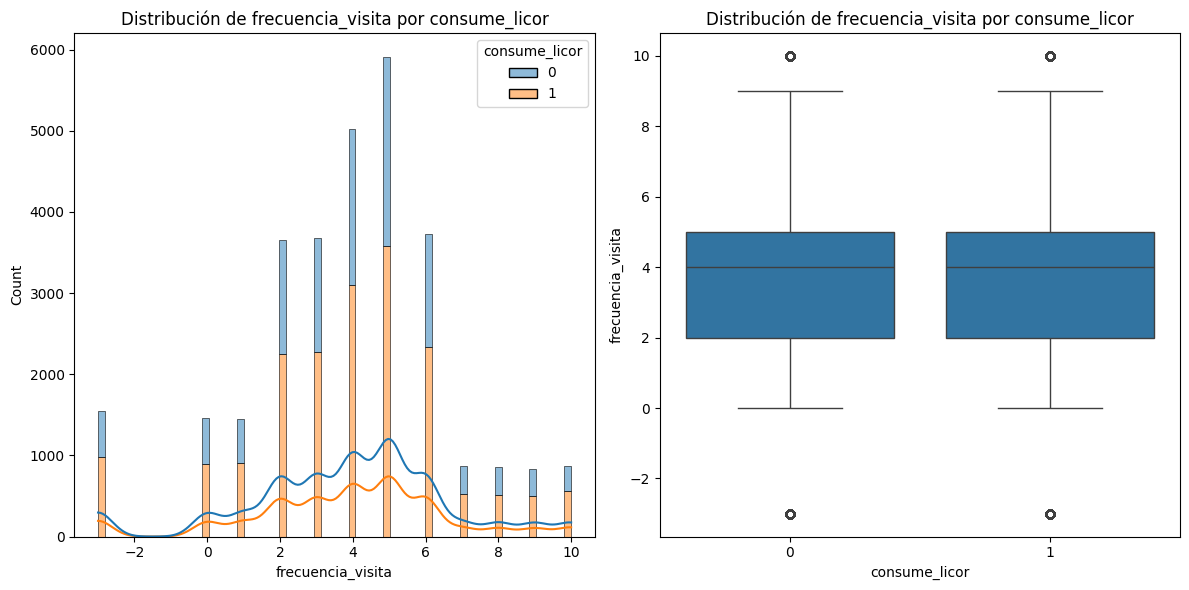

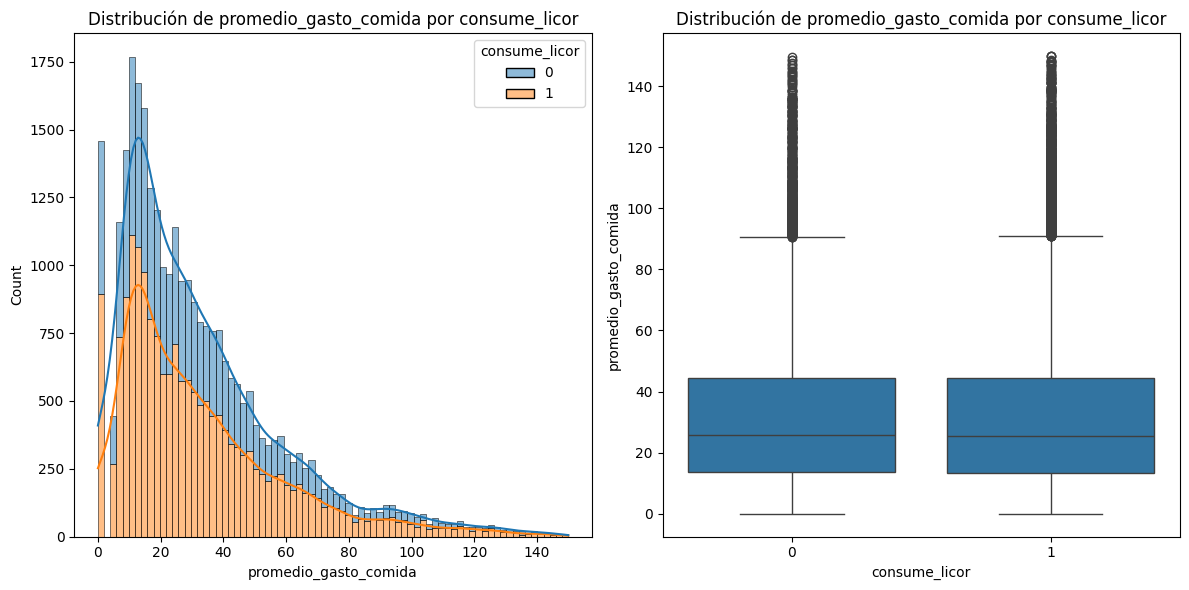

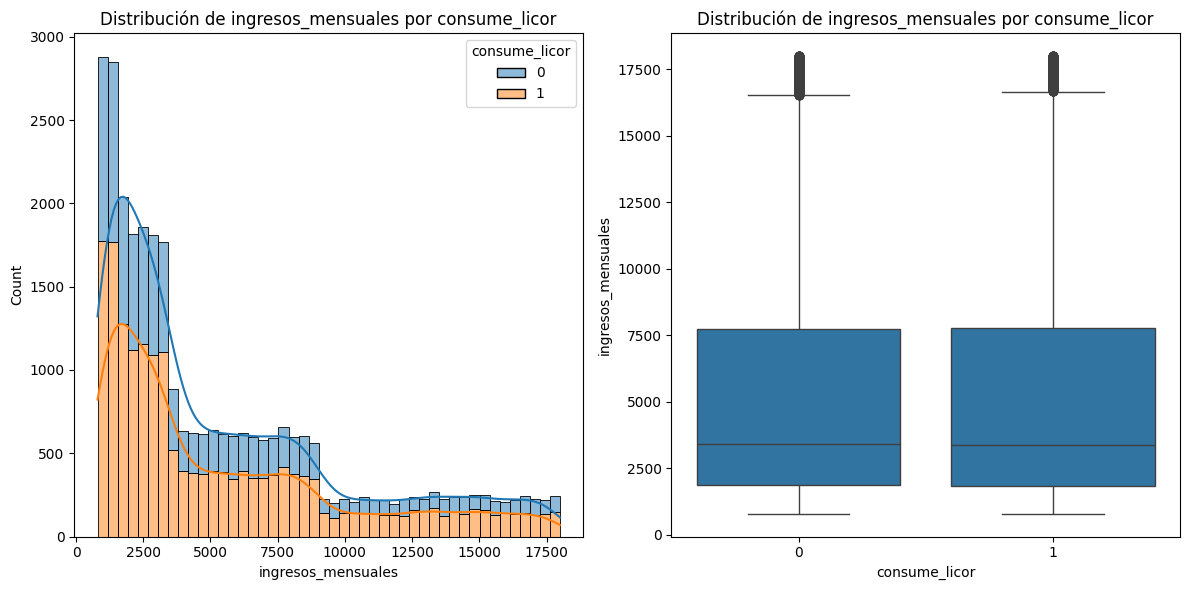


Crosstab de genero y consume_licor:


consume_licor,0,1
genero,,
Femenino,5658,9336
Masculino,5801,9095



Crosstab de ciudad_residencia y consume_licor:


consume_licor,0,1
ciudad_residencia,,
Boston,931,1607
Chicago,2001,3370
Dallas,1030,1563
Denver,1014,1497
Houston,821,1381
Miami,1266,1904
NYC,1784,2971
Phoenix,598,910
San Diego,1167,1894



Crosstab de estrato_socioeconomico y consume_licor:


consume_licor,0,1
estrato_socioeconomico,,
Bajo,2348,3794
Medio,3568,5729
Alto,3471,5531
Muy Alto,2072,3377



Crosstab de ocio y consume_licor:


consume_licor,0,1
ocio,,
No,5690,9344
Sí,5769,9087



Crosstab de preferencias_alimenticias y consume_licor:


consume_licor,0,1
preferencias_alimenticias,,
Carnes,3540,5747
Mariscos,2027,3166
Otro,990,1639
Pescado,1113,1860
Vegano,1244,2008
Vegetariano,2545,4011



Crosstab de membresia_premium y consume_licor:


consume_licor,0,1
membresia_premium,,
No,6501,10589
Sí,4958,7842



Crosstab de tipo_de_pago_mas_usado y consume_licor:


consume_licor,0,1
tipo_de_pago_mas_usado,,
App,2938,4709
Criptomoneda,218,337
Efectivo,4449,7323
Tarjeta,3854,6062


In [124]:
categorical_cols = df.select_dtypes(include=['category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    
    sns.histplot(data=df, x=col, hue='consume_licor', kde=True, multiple='stack')
    plt.title(f'Distribución de {col} por consume_licor')

    plt.subplot(1, 2, 2)
    if col == 'salario_cliente':
        sns.boxplot(data=df[df[col] < 30000000], x='consume_licor', y=col)
    else:
        sns.boxplot(data=df, x='consume_licor', y=col)
    plt.title(f'Distribución de {col} por consume_licor')

    plt.tight_layout()
    plt.show()



for col in categorical_cols:
    print(f"\nCrosstab de {col} y consume_licor:")
    display(pd.crosstab(df[col], df['consume_licor']))

## Análisis multivariable

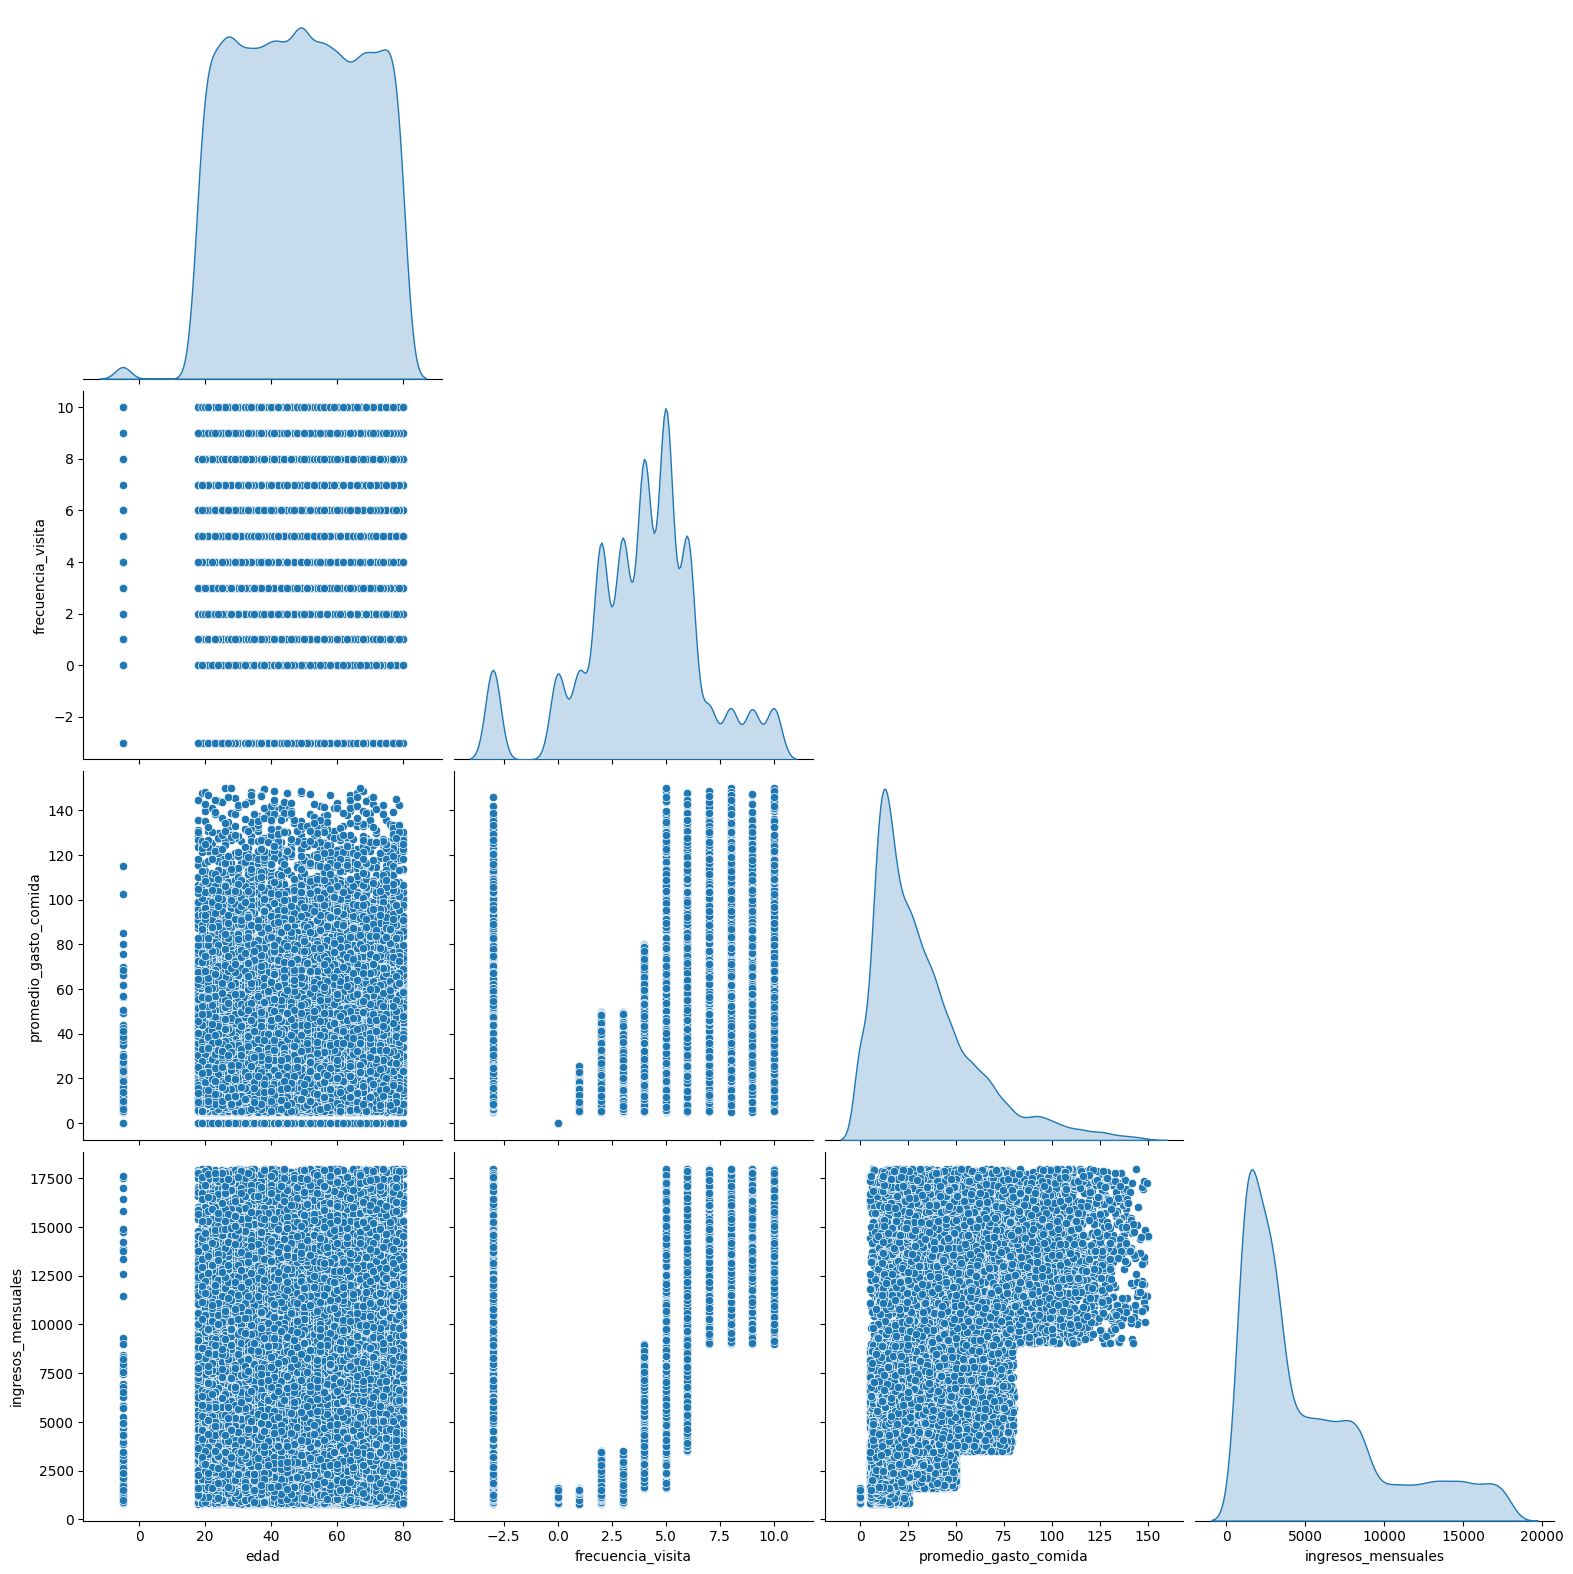

In [125]:
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True, height=4)

In [126]:
# tablas cruzadas para categóricas
from itertools import combinations

categorical_cols = df.select_dtypes(include=['category']).columns
crosstabs = {}
for a, b in combinations(categorical_cols, 2):
    ct = pd.crosstab(df[a], df[b], margins=True)
    crosstabs[(a, b)] = ct
    print(f'\n{a} vs {b} (conteos)')
    display(ct)

    ct_row = pd.crosstab(df[a], df[b], normalize='index').round(3)
    print(f'{a} vs {b} (proporciones por fila)')
    display(ct_row)


genero vs ciudad_residencia (conteos)


ciudad_residencia,Boston,Chicago,Dallas,Denver,Houston,Miami,NYC,Phoenix,San Diego,Seattle,All
genero,,,,,,,,,,,
Femenino,1307,2661,1247,1277,1083,1565,2442,745,1558,1109,14994
Masculino,1231,2710,1346,1234,1119,1605,2313,763,1503,1072,14896
All,2538,5371,2593,2511,2202,3170,4755,1508,3061,2181,29890


genero vs ciudad_residencia (proporciones por fila)


ciudad_residencia,Boston,Chicago,Dallas,Denver,Houston,Miami,NYC,Phoenix,San Diego,Seattle
genero,,,,,,,,,,
Femenino,0.087,0.177,0.083,0.085,0.072,0.104,0.163,0.050,0.104,0.074
Masculino,0.083,0.182,0.090,0.083,0.075,0.108,0.155,0.051,0.101,0.072



genero vs estrato_socioeconomico (conteos)


estrato_socioeconomico,Bajo,Medio,Alto,Muy Alto,All
genero,,,,,
Femenino,3144,4633,4450,2767,14994
Masculino,2998,4664,4552,2682,14896
All,6142,9297,9002,5449,29890


genero vs estrato_socioeconomico (proporciones por fila)


estrato_socioeconomico,Bajo,Medio,Alto,Muy Alto
genero,,,,
Femenino,0.210,0.309,0.297,0.185
Masculino,0.201,0.313,0.306,0.180



genero vs ocio (conteos)


ocio,No,Sí,All
genero,,,
Femenino,7583,7411,14994
Masculino,7451,7445,14896
All,15034,14856,29890


genero vs ocio (proporciones por fila)


ocio,No,Sí
genero,,
Femenino,0.506,0.494
Masculino,0.500,0.500



genero vs preferencias_alimenticias (conteos)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano,All
genero,,,,,,,
Femenino,4696,2566,1279,1504,1625,3324,14994
Masculino,4591,2627,1350,1469,1627,3232,14896
All,9287,5193,2629,2973,3252,6556,29890


genero vs preferencias_alimenticias (proporciones por fila)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano
genero,,,,,,
Femenino,0.313,0.171,0.085,0.100,0.108,0.222
Masculino,0.308,0.176,0.091,0.099,0.109,0.217



genero vs membresia_premium (conteos)


membresia_premium,No,Sí,All
genero,,,
Femenino,8569,6425,14994
Masculino,8521,6375,14896
All,17090,12800,29890


genero vs membresia_premium (proporciones por fila)


membresia_premium,No,Sí
genero,,
Femenino,0.571,0.429
Masculino,0.572,0.428



genero vs tipo_de_pago_mas_usado (conteos)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta,All
genero,,,,,
Femenino,3807,283,5896,5008,14994
Masculino,3840,272,5876,4908,14896
All,7647,555,11772,9916,29890


genero vs tipo_de_pago_mas_usado (proporciones por fila)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta
genero,,,,
Femenino,0.254,0.019,0.393,0.334
Masculino,0.258,0.018,0.394,0.329



ciudad_residencia vs estrato_socioeconomico (conteos)


estrato_socioeconomico,Bajo,Medio,Alto,Muy Alto,All
ciudad_residencia,,,,,
Boston,524,727,757,530,2538
Chicago,1145,1795,1509,922,5371
Dallas,625,859,733,376,2593
Denver,505,761,843,402,2511
Houston,565,755,552,330,2202
Miami,442,780,1153,795,3170
NYC,1133,1711,1209,702,4755
Phoenix,340,481,434,253,1508
San Diego,460,818,1089,694,3061


ciudad_residencia vs estrato_socioeconomico (proporciones por fila)


estrato_socioeconomico,Bajo,Medio,Alto,Muy Alto
ciudad_residencia,,,,
Boston,0.206,0.286,0.298,0.209
Chicago,0.213,0.334,0.281,0.172
Dallas,0.241,0.331,0.283,0.145
Denver,0.201,0.303,0.336,0.160
Houston,0.257,0.343,0.251,0.150
Miami,0.139,0.246,0.364,0.251
NYC,0.238,0.360,0.254,0.148
Phoenix,0.225,0.319,0.288,0.168
San Diego,0.150,0.267,0.356,0.227



ciudad_residencia vs ocio (conteos)


ocio,No,Sí,All
ciudad_residencia,,,
Boston,1272,1266,2538
Chicago,2707,2664,5371
Dallas,1306,1287,2593
Denver,1243,1268,2511
Houston,1103,1099,2202
Miami,1574,1596,3170
NYC,2417,2338,4755
Phoenix,752,756,1508
San Diego,1560,1501,3061


ciudad_residencia vs ocio (proporciones por fila)


ocio,No,Sí
ciudad_residencia,,
Boston,0.501,0.499
Chicago,0.504,0.496
Dallas,0.504,0.496
Denver,0.495,0.505
Houston,0.501,0.499
Miami,0.497,0.503
NYC,0.508,0.492
Phoenix,0.499,0.501
San Diego,0.510,0.490



ciudad_residencia vs preferencias_alimenticias (conteos)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano,All
ciudad_residencia,,,,,,,
Boston,633,492,195,272,239,707,2538
Chicago,1853,695,591,543,567,1122,5371
Dallas,945,365,248,238,258,539,2593
Denver,747,465,172,248,257,622,2511
Houston,800,332,236,229,196,409,2202
Miami,654,816,291,306,379,724,3170
NYC,1712,797,395,433,585,833,4755
Phoenix,491,208,154,200,154,301,1508
San Diego,843,581,193,288,406,750,3061


ciudad_residencia vs preferencias_alimenticias (proporciones por fila)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano
ciudad_residencia,,,,,,
Boston,0.249,0.194,0.077,0.107,0.094,0.279
Chicago,0.345,0.129,0.110,0.101,0.106,0.209
Dallas,0.364,0.141,0.096,0.092,0.099,0.208
Denver,0.297,0.185,0.068,0.099,0.102,0.248
Houston,0.363,0.151,0.107,0.104,0.089,0.186
Miami,0.206,0.257,0.092,0.097,0.120,0.228
NYC,0.360,0.168,0.083,0.091,0.123,0.175
Phoenix,0.326,0.138,0.102,0.133,0.102,0.200
San Diego,0.275,0.190,0.063,0.094,0.133,0.245



ciudad_residencia vs membresia_premium (conteos)


membresia_premium,No,Sí,All
ciudad_residencia,,,
Boston,1402,1136,2538
Chicago,3162,2209,5371
Dallas,1603,990,2593
Denver,1449,1062,2511
Houston,1398,804,2202
Miami,1485,1685,3170
NYC,2988,1767,4755
Phoenix,880,628,1508
San Diego,1563,1498,3061


ciudad_residencia vs membresia_premium (proporciones por fila)


membresia_premium,No,Sí
ciudad_residencia,,
Boston,0.552,0.448
Chicago,0.589,0.411
Dallas,0.618,0.382
Denver,0.577,0.423
Houston,0.635,0.365
Miami,0.468,0.532
NYC,0.628,0.372
Phoenix,0.584,0.416
San Diego,0.511,0.489



ciudad_residencia vs tipo_de_pago_mas_usado (conteos)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta,All
ciudad_residencia,,,,,
Boston,662,48,1008,820,2538
Chicago,1371,99,2116,1785,5371
Dallas,666,47,1014,866,2593
Denver,630,44,974,863,2511
Houston,539,42,880,741,2202
Miami,868,64,1216,1022,3170
NYC,1175,88,1909,1583,4755
Phoenix,399,32,572,505,1508
San Diego,777,45,1238,1001,3061


ciudad_residencia vs tipo_de_pago_mas_usado (proporciones por fila)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta
ciudad_residencia,,,,
Boston,0.261,0.019,0.397,0.323
Chicago,0.255,0.018,0.394,0.332
Dallas,0.257,0.018,0.391,0.334
Denver,0.251,0.018,0.388,0.344
Houston,0.245,0.019,0.400,0.337
Miami,0.274,0.020,0.384,0.322
NYC,0.247,0.019,0.401,0.333
Phoenix,0.265,0.021,0.379,0.335
San Diego,0.254,0.015,0.404,0.327



estrato_socioeconomico vs ocio (conteos)


ocio,No,Sí,All
estrato_socioeconomico,,,
Bajo,3141,3001,6142
Medio,4705,4592,9297
Alto,4507,4495,9002
Muy Alto,2681,2768,5449
All,15034,14856,29890


estrato_socioeconomico vs ocio (proporciones por fila)


ocio,No,Sí
estrato_socioeconomico,,
Bajo,0.511,0.489
Medio,0.506,0.494
Alto,0.501,0.499
Muy Alto,0.492,0.508



estrato_socioeconomico vs preferencias_alimenticias (conteos)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano,All
estrato_socioeconomico,,,,,,,
Bajo,1958,1051,546,647,642,1298,6142
Medio,2942,1568,821,919,1051,1996,9297
Alto,2741,1592,799,896,962,2012,9002
Muy Alto,1646,982,463,511,597,1250,5449
All,9287,5193,2629,2973,3252,6556,29890


estrato_socioeconomico vs preferencias_alimenticias (proporciones por fila)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano
estrato_socioeconomico,,,,,,
Bajo,0.319,0.171,0.089,0.105,0.105,0.211
Medio,0.316,0.169,0.088,0.099,0.113,0.215
Alto,0.304,0.177,0.089,0.100,0.107,0.224
Muy Alto,0.302,0.180,0.085,0.094,0.110,0.229



estrato_socioeconomico vs membresia_premium (conteos)


membresia_premium,No,Sí,All
estrato_socioeconomico,,,
Bajo,6115,27,6142
Medio,7999,1298,9297
Alto,2718,6284,9002
Muy Alto,258,5191,5449
All,17090,12800,29890


estrato_socioeconomico vs membresia_premium (proporciones por fila)


membresia_premium,No,Sí
estrato_socioeconomico,,
Bajo,0.996,0.004
Medio,0.860,0.140
Alto,0.302,0.698
Muy Alto,0.047,0.953



estrato_socioeconomico vs tipo_de_pago_mas_usado (conteos)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta,All
estrato_socioeconomico,,,,,
Bajo,1563,122,2421,2036,6142
Medio,2430,181,3601,3085,9297
Alto,2310,157,3580,2955,9002
Muy Alto,1344,95,2170,1840,5449
All,7647,555,11772,9916,29890


estrato_socioeconomico vs tipo_de_pago_mas_usado (proporciones por fila)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta
estrato_socioeconomico,,,,
Bajo,0.254,0.020,0.394,0.331
Medio,0.261,0.019,0.387,0.332
Alto,0.257,0.017,0.398,0.328
Muy Alto,0.247,0.017,0.398,0.338



ocio vs preferencias_alimenticias (conteos)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano,All
ocio,,,,,,,
No,4643,2590,1310,1509,1646,3336,15034
Sí,4644,2603,1319,1464,1606,3220,14856
All,9287,5193,2629,2973,3252,6556,29890


ocio vs preferencias_alimenticias (proporciones por fila)


preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Vegano,Vegetariano
ocio,,,,,,
No,0.309,0.172,0.087,0.100,0.109,0.222
Sí,0.313,0.175,0.089,0.099,0.108,0.217



ocio vs membresia_premium (conteos)


membresia_premium,No,Sí,All
ocio,,,
No,8665,6369,15034
Sí,8425,6431,14856
All,17090,12800,29890


ocio vs membresia_premium (proporciones por fila)


membresia_premium,No,Sí
ocio,,
No,0.576,0.424
Sí,0.567,0.433



ocio vs tipo_de_pago_mas_usado (conteos)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta,All
ocio,,,,,
No,3866,274,5858,5036,15034
Sí,3781,281,5914,4880,14856
All,7647,555,11772,9916,29890


ocio vs tipo_de_pago_mas_usado (proporciones por fila)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta
ocio,,,,
No,0.257,0.018,0.390,0.335
Sí,0.255,0.019,0.398,0.328



preferencias_alimenticias vs membresia_premium (conteos)


membresia_premium,No,Sí,All
preferencias_alimenticias,,,
Carnes,5465,3822,9287
Mariscos,2901,2292,5193
Otro,1526,1103,2629
Pescado,1713,1260,2973
Vegano,1855,1397,3252
Vegetariano,3630,2926,6556
All,17090,12800,29890


preferencias_alimenticias vs membresia_premium (proporciones por fila)


membresia_premium,No,Sí
preferencias_alimenticias,,
Carnes,0.588,0.412
Mariscos,0.559,0.441
Otro,0.580,0.420
Pescado,0.576,0.424
Vegano,0.570,0.430
Vegetariano,0.554,0.446



preferencias_alimenticias vs tipo_de_pago_mas_usado (conteos)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta,All
preferencias_alimenticias,,,,,
Carnes,2386,167,3617,3117,9287
Mariscos,1386,101,2016,1690,5193
Otro,664,45,1071,849,2629
Pescado,739,56,1162,1016,2973
Vegano,817,58,1268,1109,3252
Vegetariano,1655,128,2638,2135,6556
All,7647,555,11772,9916,29890


preferencias_alimenticias vs tipo_de_pago_mas_usado (proporciones por fila)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta
preferencias_alimenticias,,,,
Carnes,0.257,0.018,0.389,0.336
Mariscos,0.267,0.019,0.388,0.325
Otro,0.253,0.017,0.407,0.323
Pescado,0.249,0.019,0.391,0.342
Vegano,0.251,0.018,0.390,0.341
Vegetariano,0.252,0.020,0.402,0.326



membresia_premium vs tipo_de_pago_mas_usado (conteos)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta,All
membresia_premium,,,,,
No,4438,333,6643,5676,17090
Sí,3209,222,5129,4240,12800
All,7647,555,11772,9916,29890


membresia_premium vs tipo_de_pago_mas_usado (proporciones por fila)


tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta
membresia_premium,,,,
No,0.260,0.019,0.389,0.332
Sí,0.251,0.017,0.401,0.331


C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


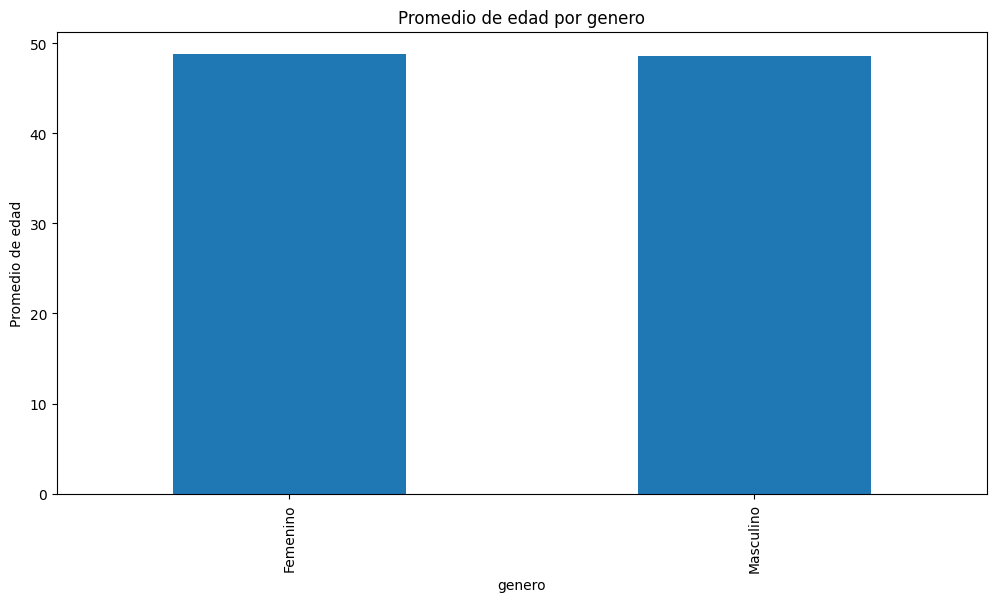

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


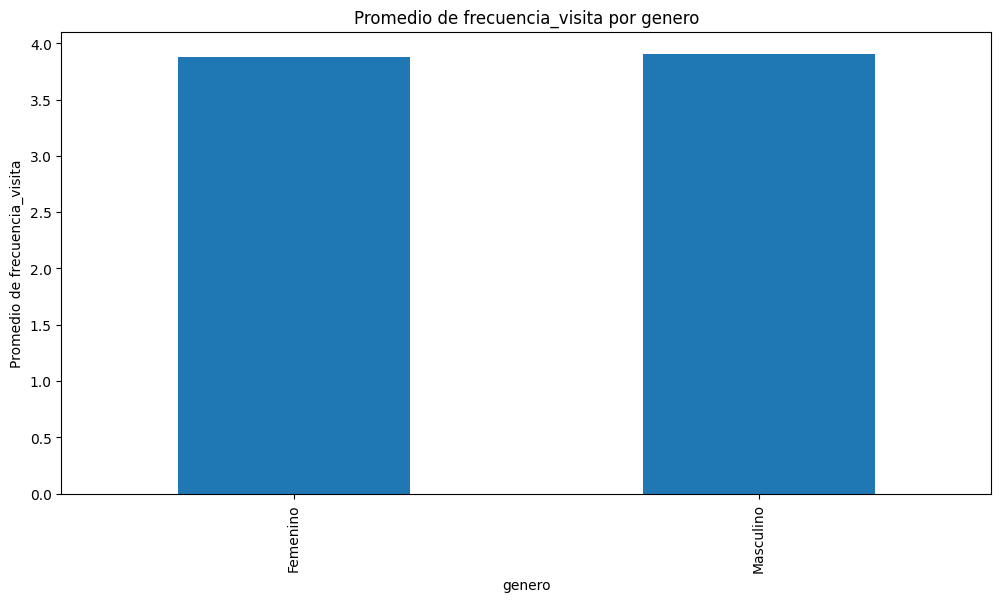

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


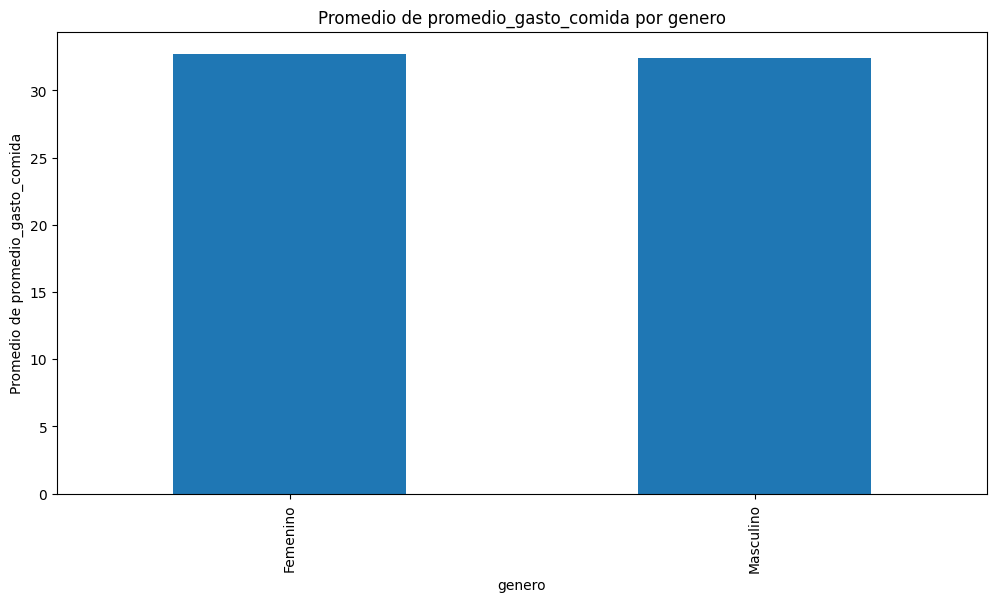

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


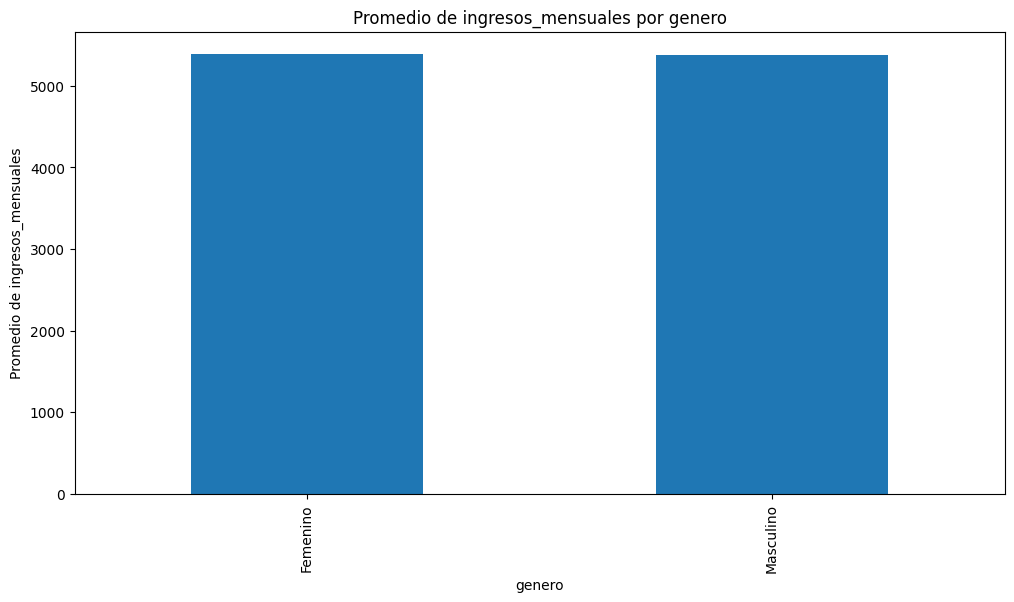

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


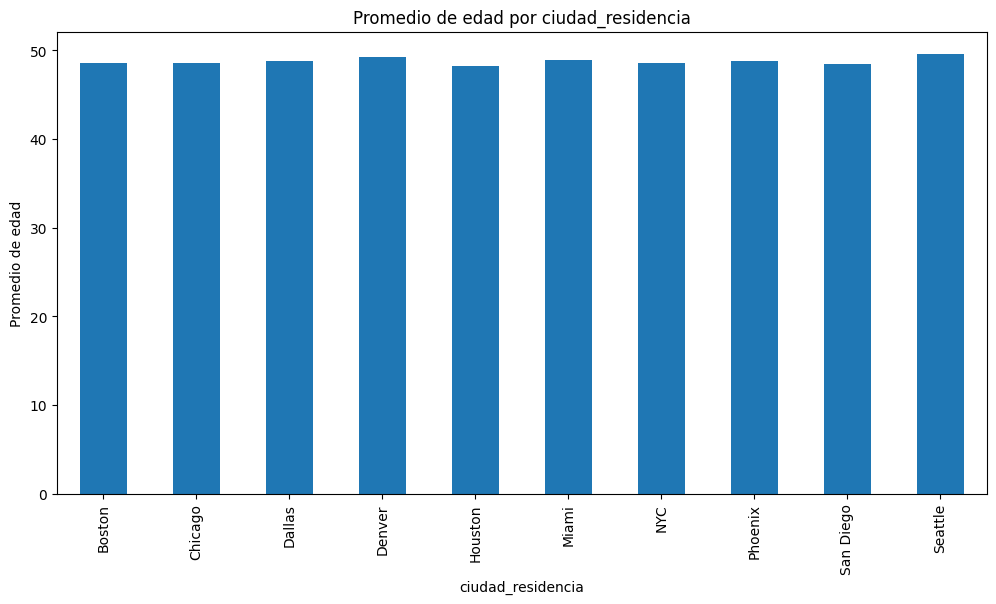

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


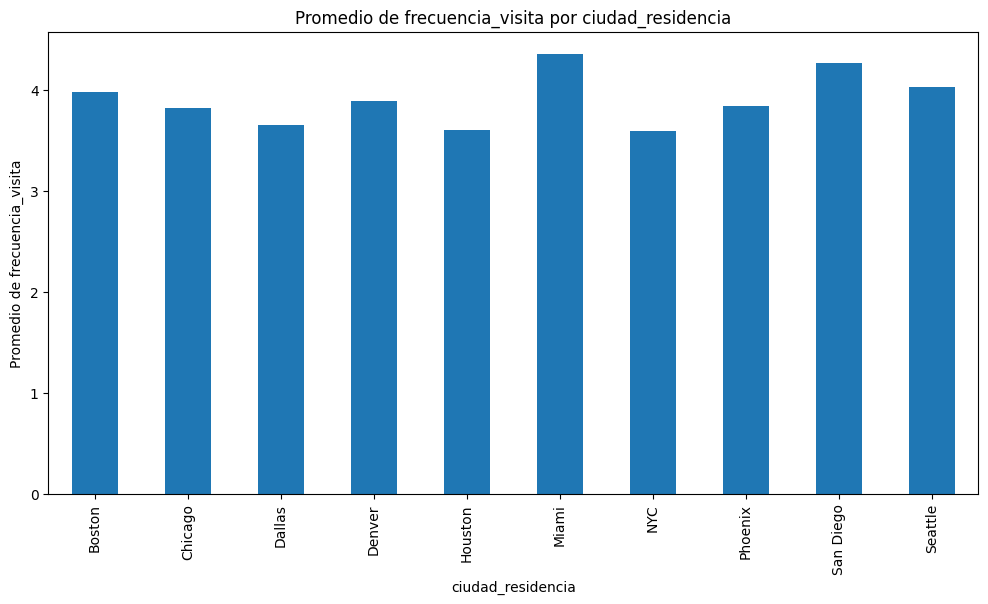

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


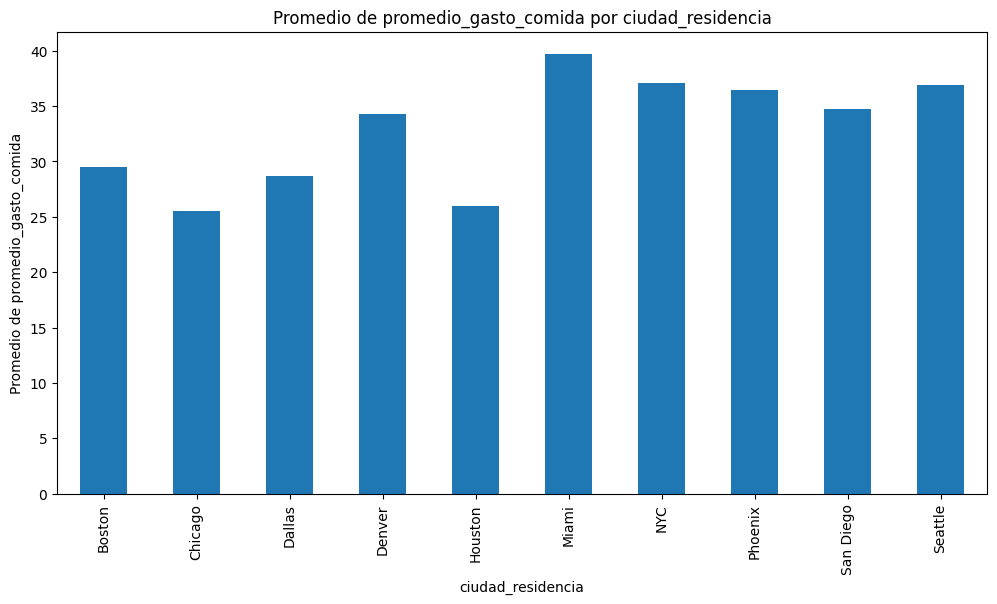

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


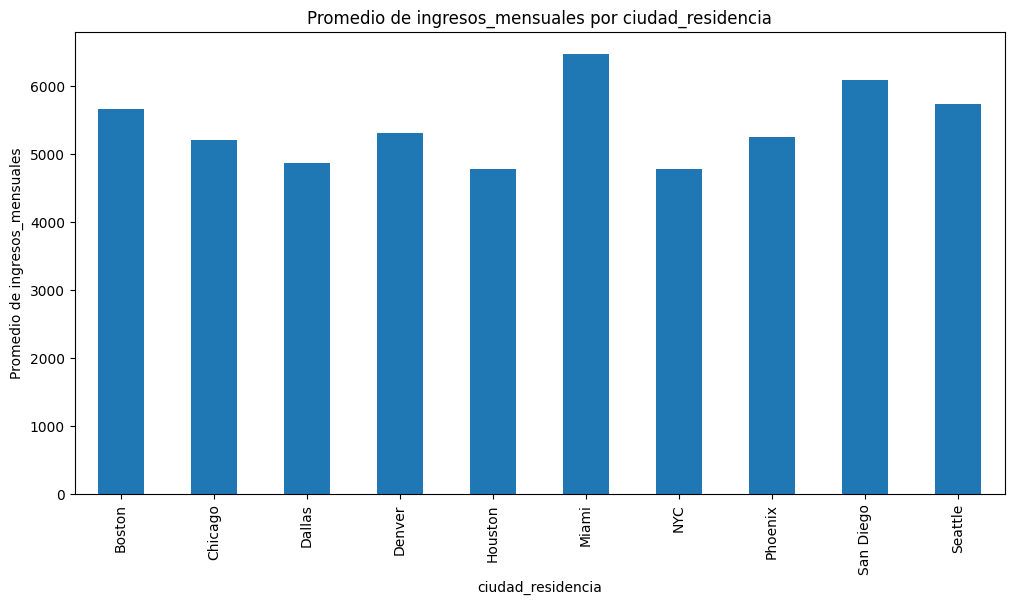

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


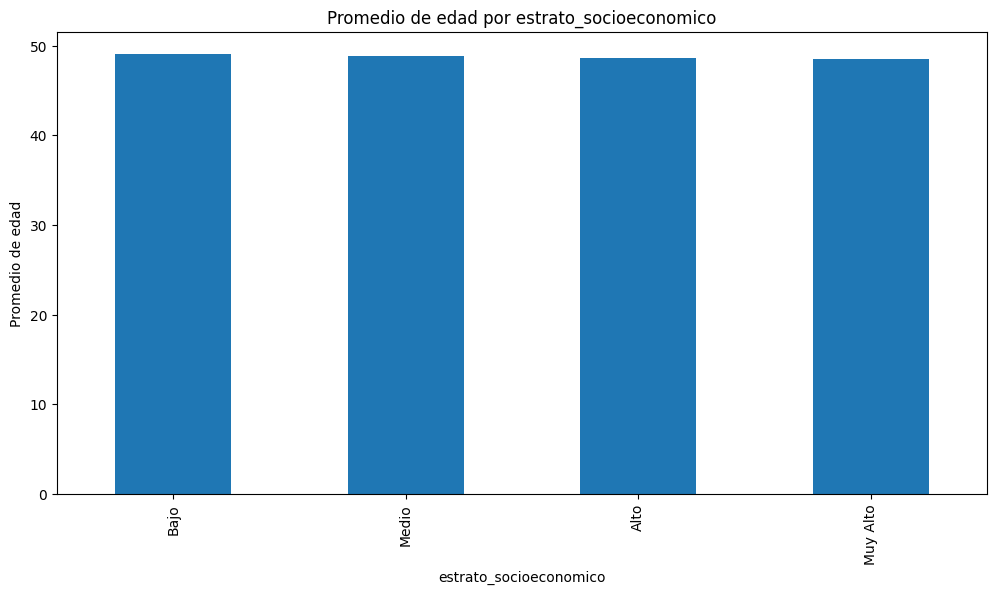

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


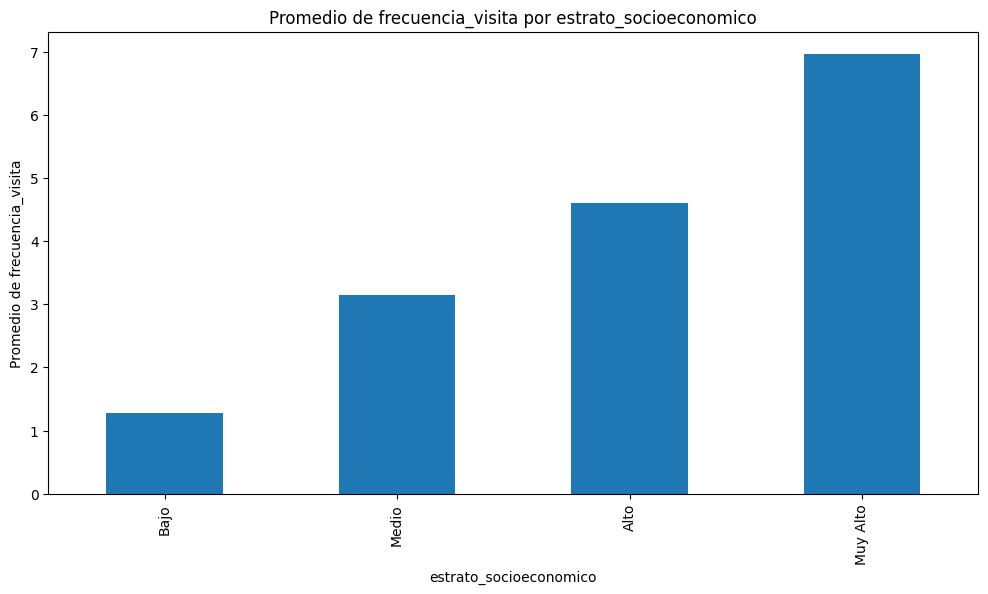

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


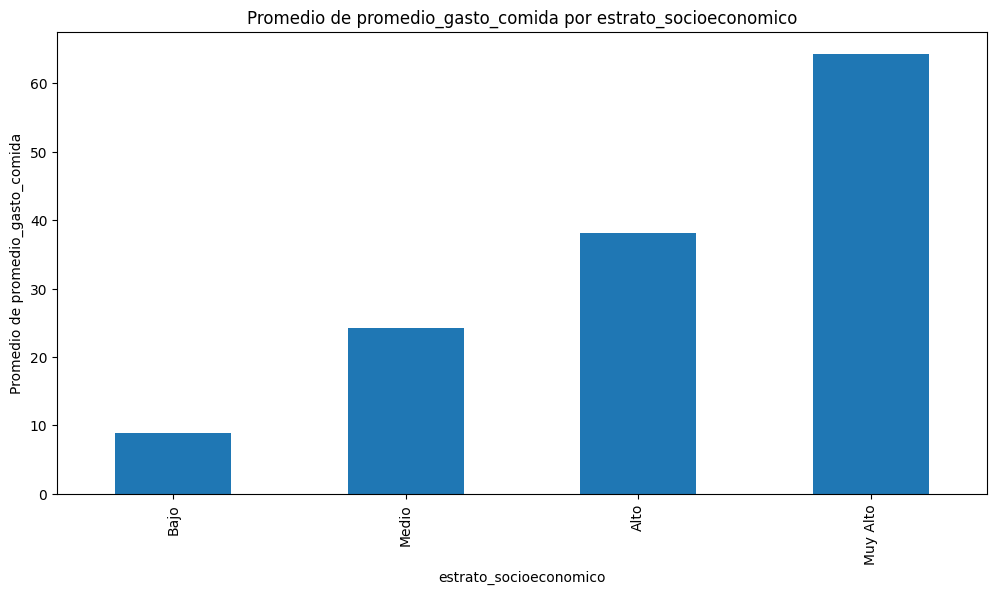

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


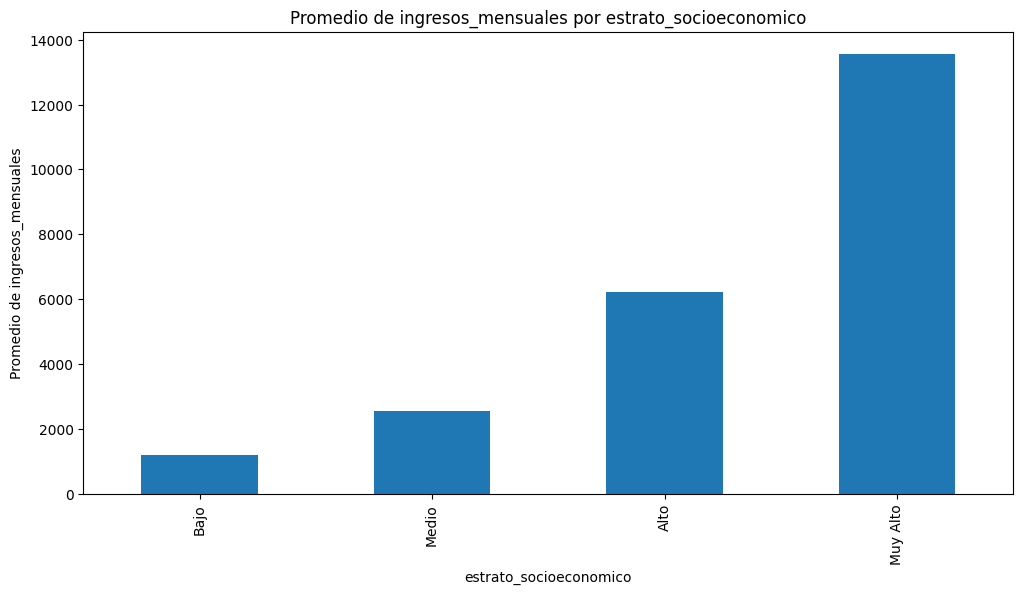

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


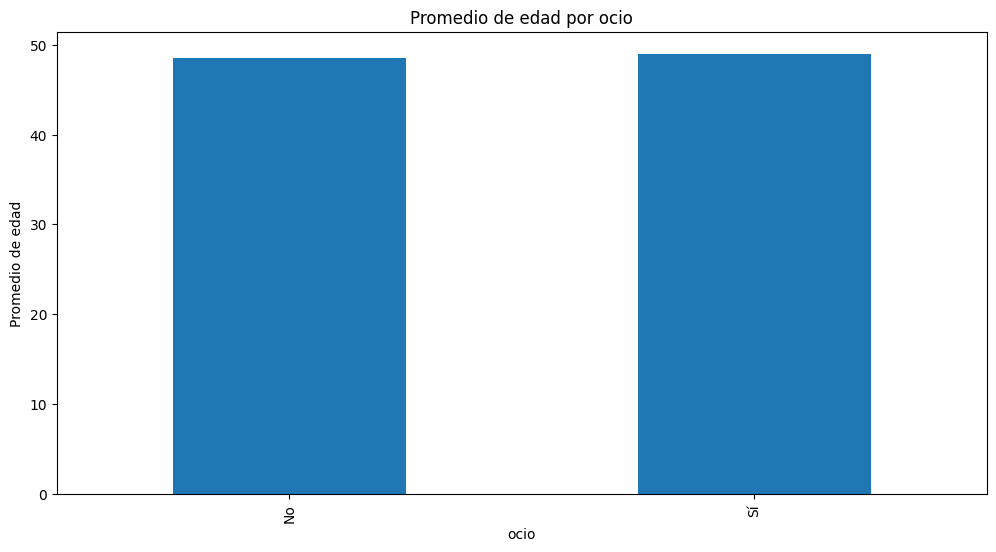

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


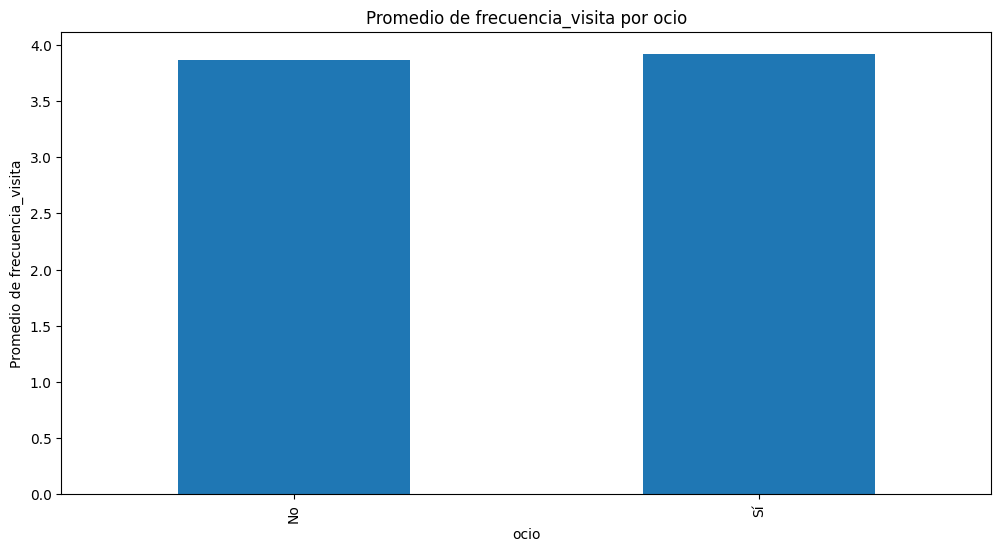

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


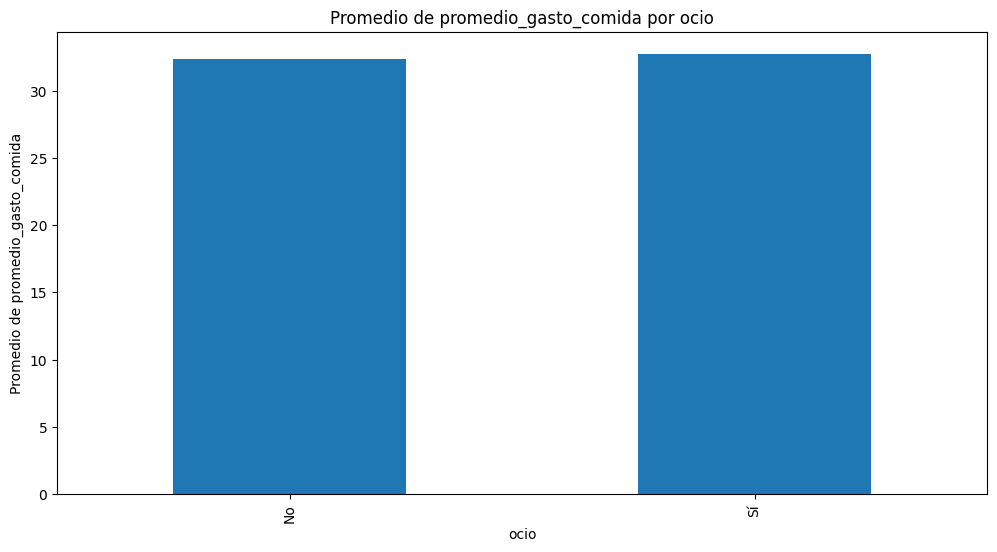

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


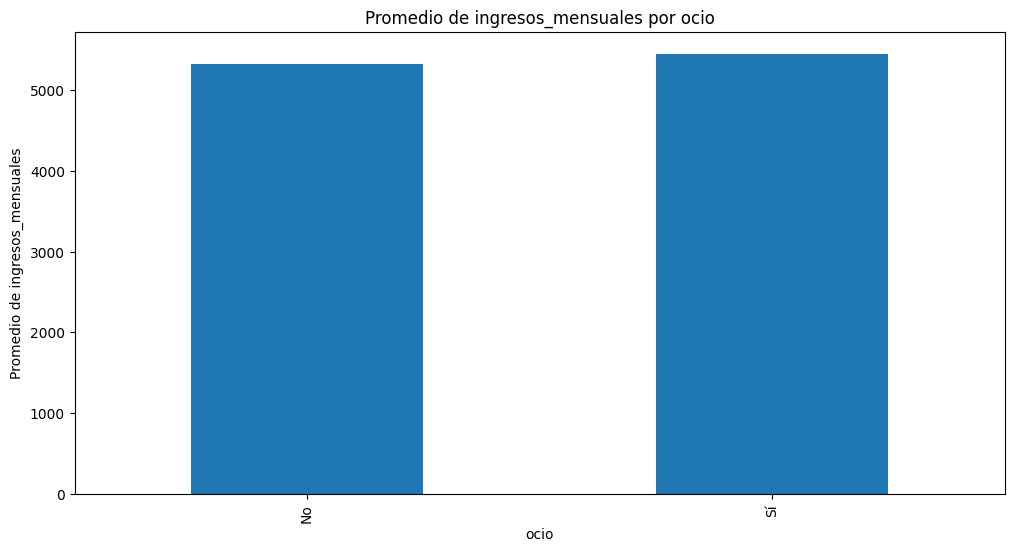

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


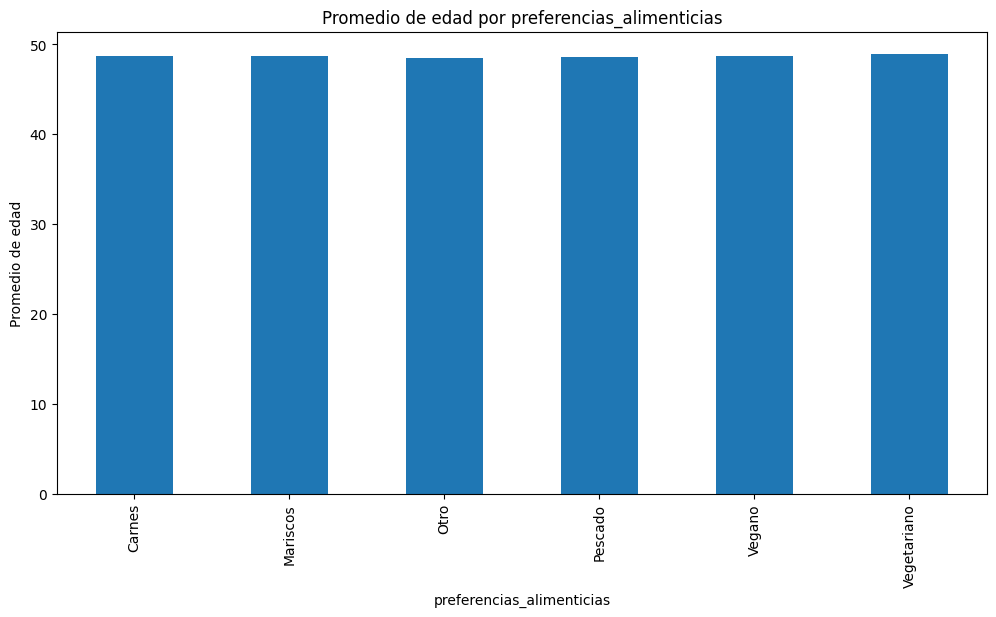

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


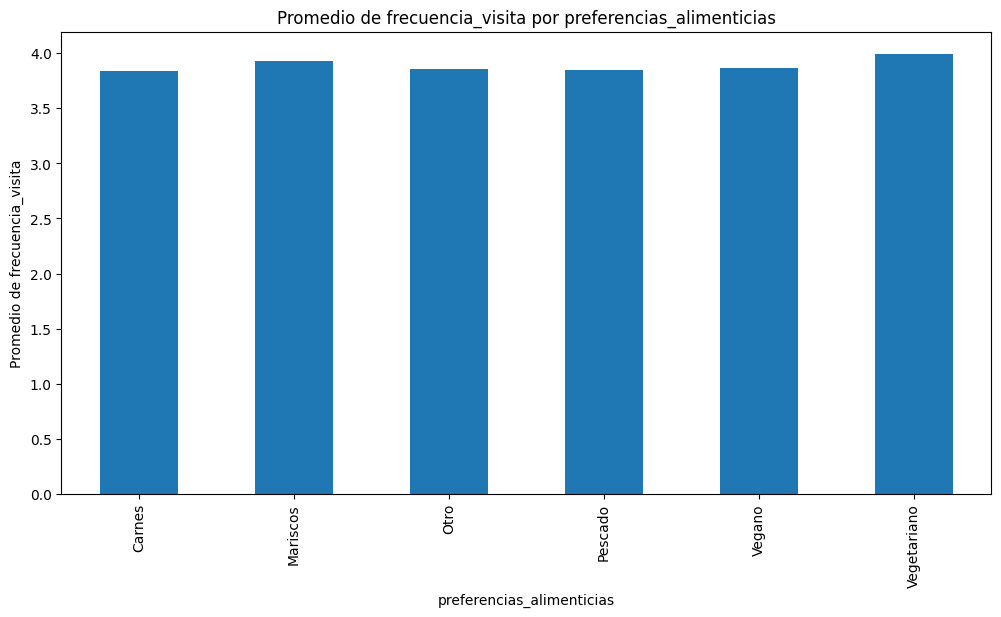

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


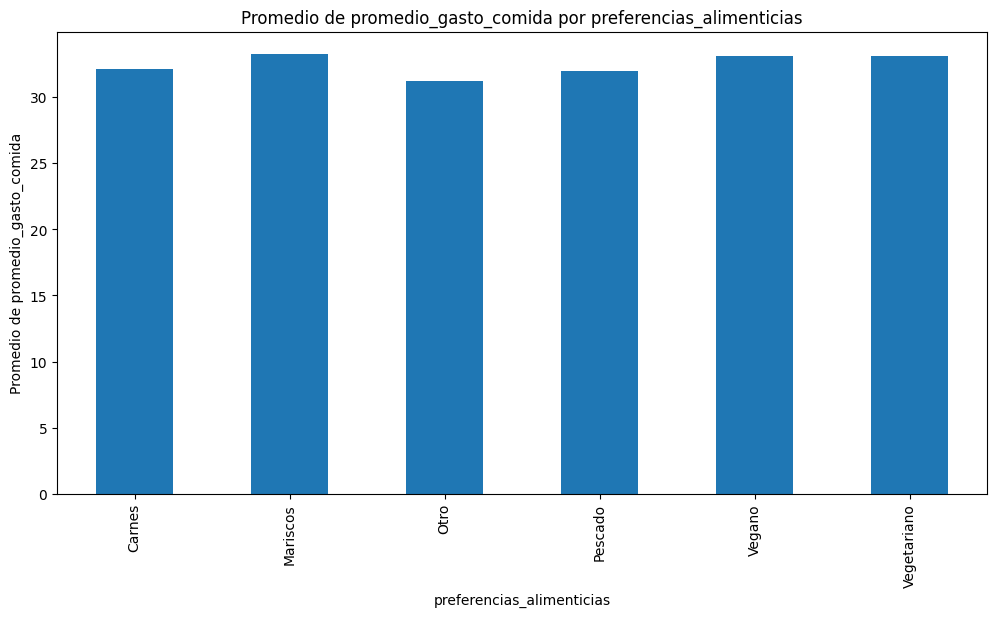

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


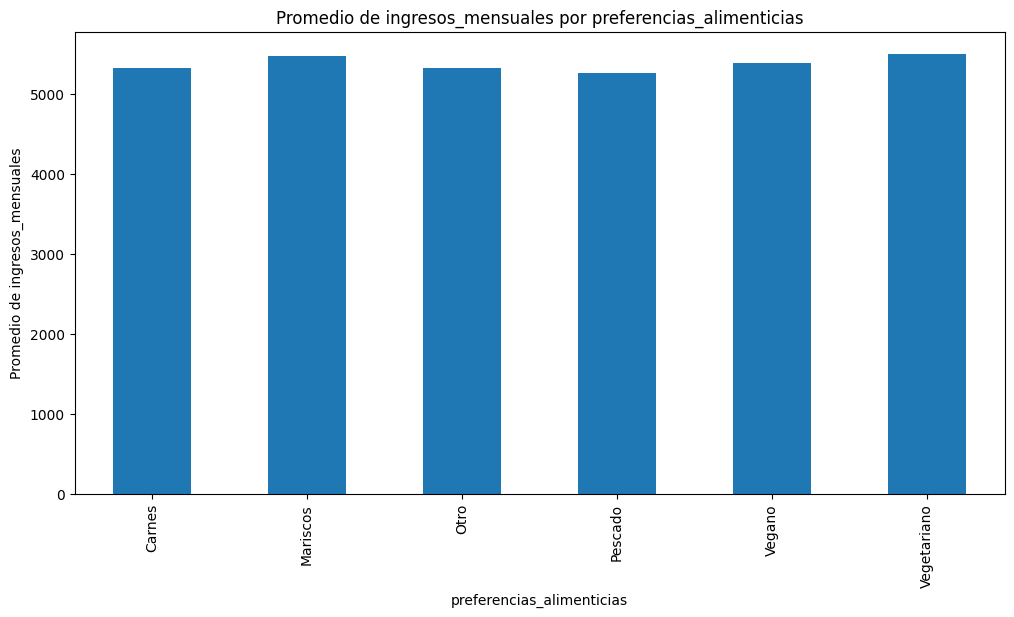

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


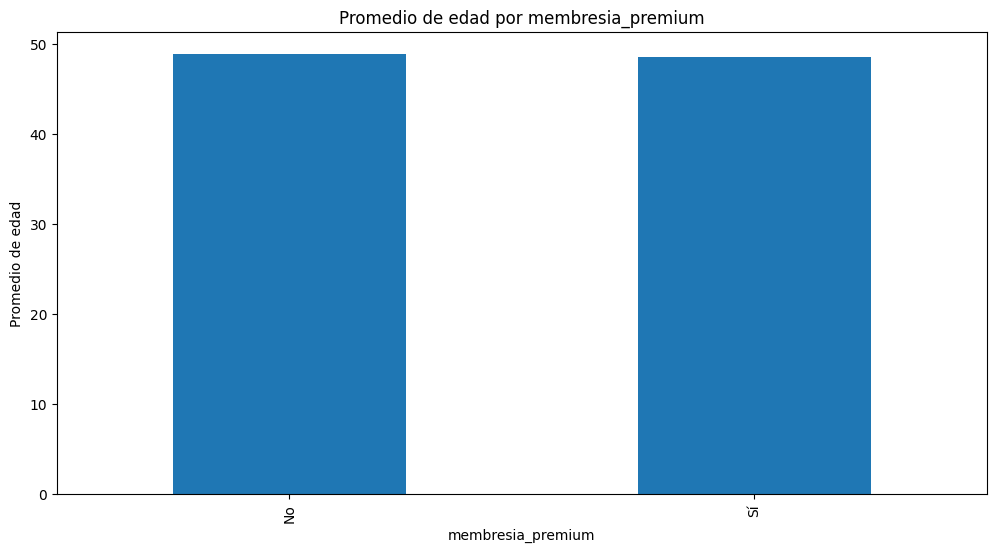

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


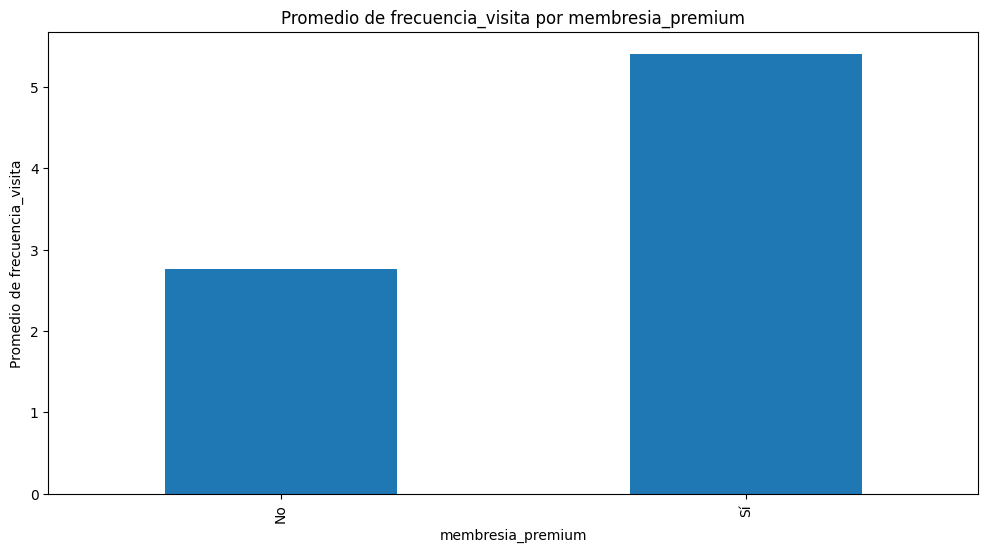

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


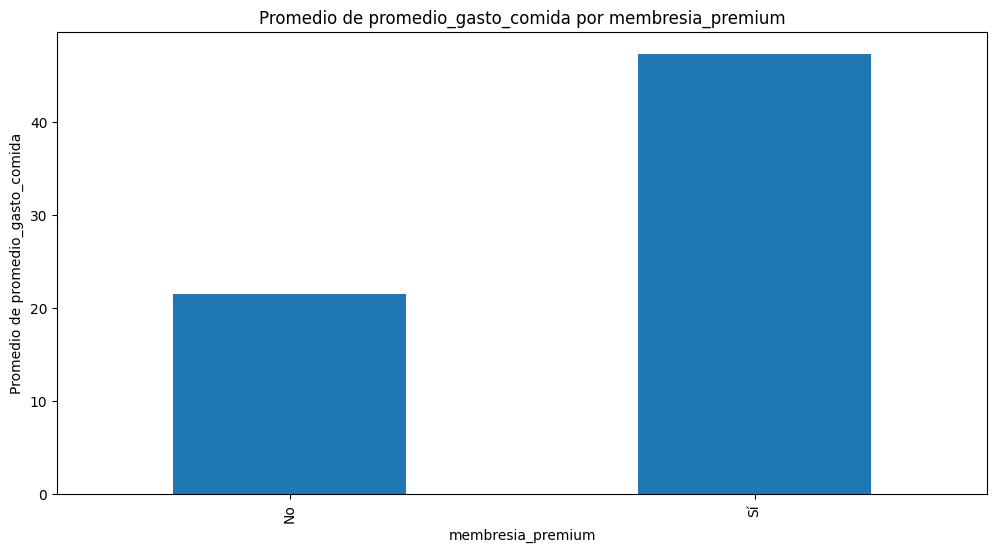

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


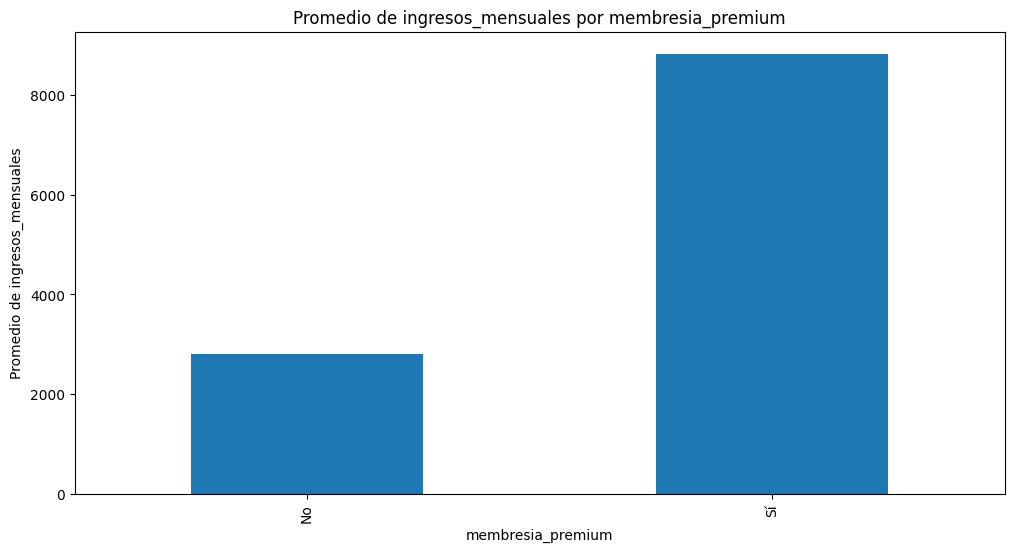

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


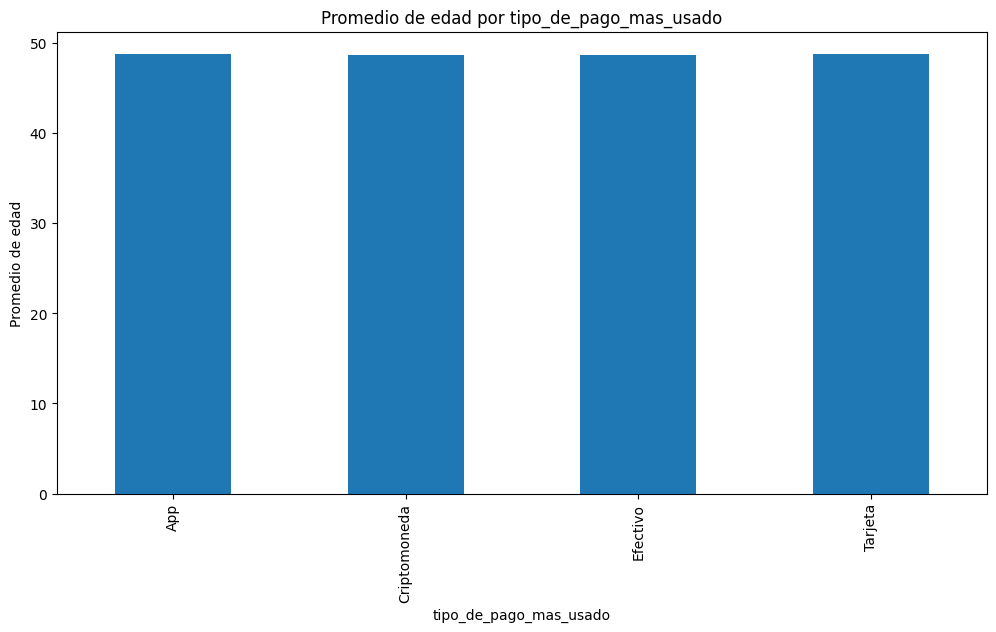

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


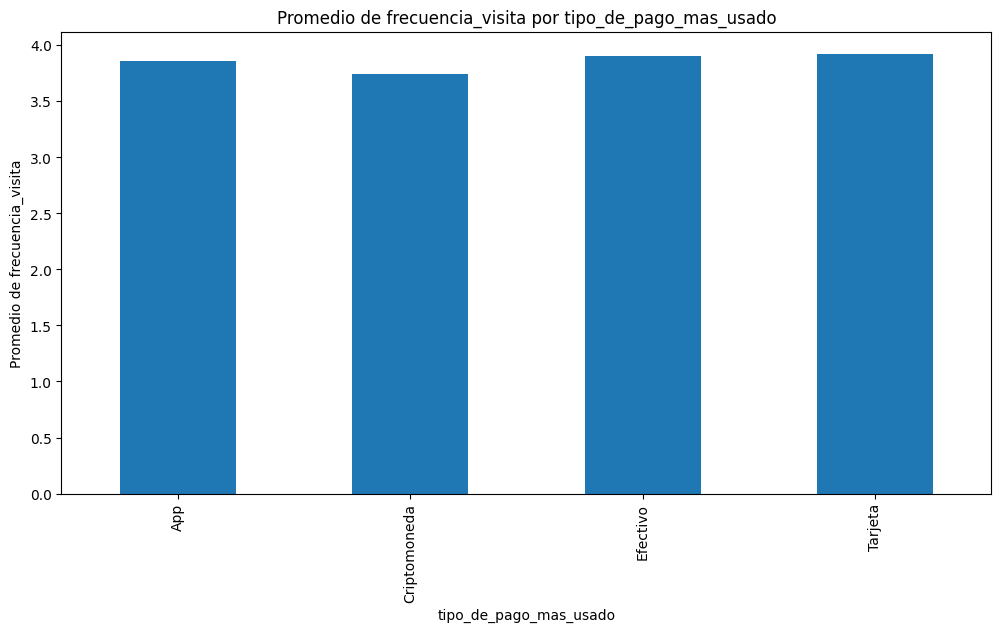

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


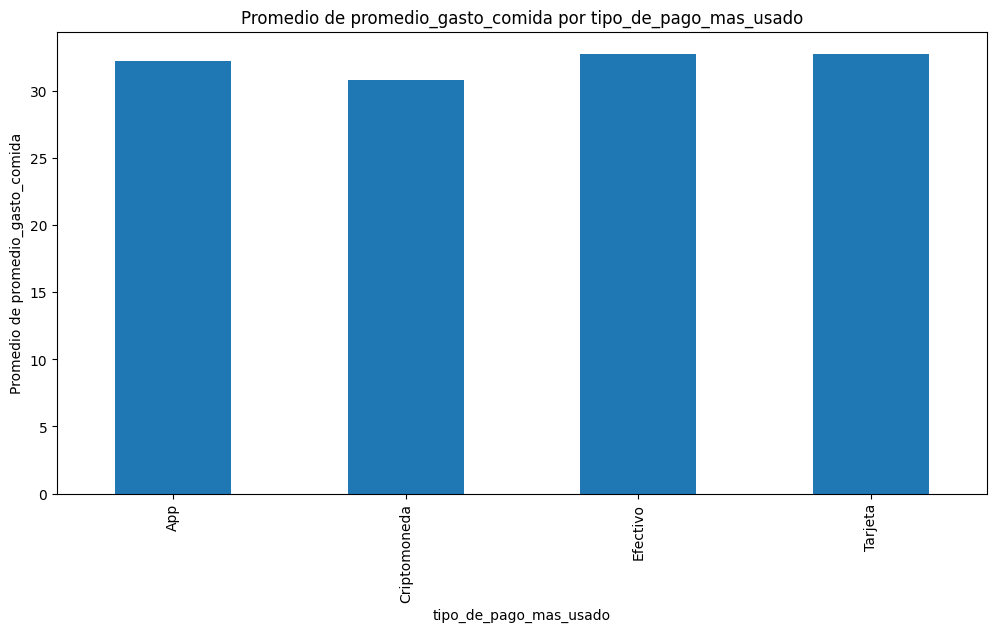

C:\Users\juani\AppData\Local\Temp\ipykernel_20748\3276904300.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat_col)[num_col].mean().plot(kind='bar')


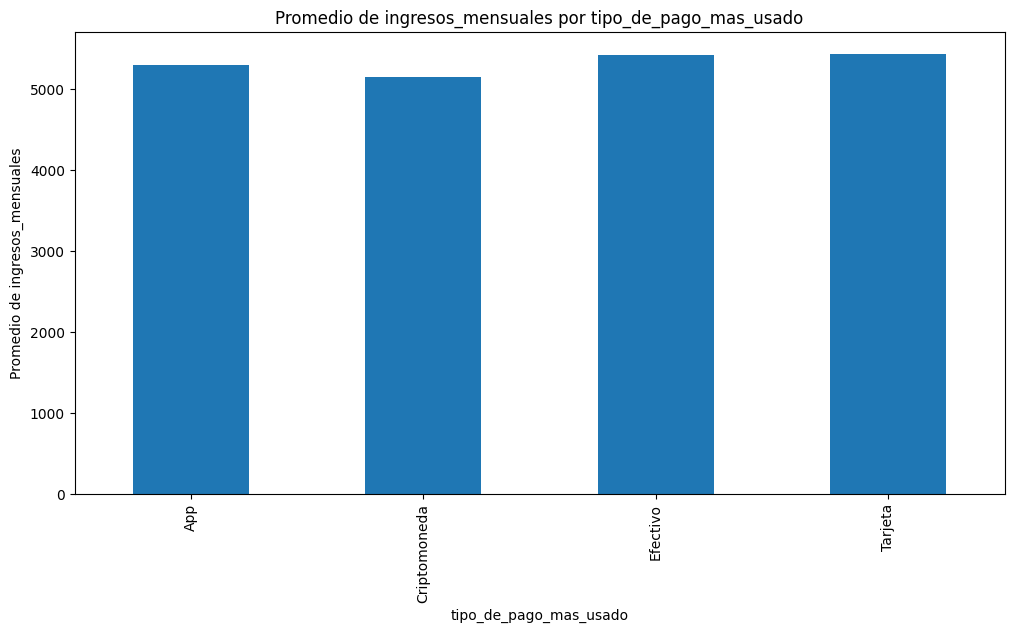

In [127]:
# Análisis multivariable entre variables categóricas y numéricas
for cat_col in categorical_cols:
    for num_col in numerical_cols:

        # mostrar un gráfico de barras donde el eje x es la variable categórica y el eje y es la media de la variable numérica
        plt.figure(figsize=(12, 6))
        df.groupby(cat_col)[num_col].mean().plot(kind='bar')
        plt.title(f"Promedio de {num_col} por {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel(f"Promedio de {num_col}")
        plt.show()
